# AdD Trabajo Práctico Final CEIA 17Co2024
## Autores: Joaquín Matías Mestanza, Gonzalo Nicolas Silva Caggiano, Ramiro Andrés Feichubuinm




El dataset weatherAUS contiene datos meteorológicos recolectados en varias ubicaciones de Australia.

| Column          | Tipo de dato               | Descripción                                                                                      |
|-----------------|----------------------------|--------------------------------------------------------------------------------------------------|
| **Date**        | Fecha                      | Fecha de la observación meteorológica.                                                           |
| **Location**    | Categórico                 | El nombre de la ubicación en Australia donde se realizó la medición.                             |
| **MinTemp**     | Numérico (float)           | Temperatura mínima registrada (C°).                                                              |
| **MaxTemp**     | Numérico (float)           | Temperatura máxima registrada (C°).                                                              |
| **Rainfall**    | Numérico (float)           | Cantidad total de lluvia en milímetros registrada ese día.                                       |
| **Evaporation** | Numérico (float)           | Cantidad de agua evaporada en milímetros, medida durante las 24 horas hasta las 9 AM.            |
| **Sunshine**    | Numérico (float)           | Cantidad de horas de sol registradas durante el día.                                             |
| **WindGustDir** | Categórico                 | Dirección del viento en ráfagas más fuerte registrado durante el día (en puntos cardinales).     |
| **WindGustSpeed**| Numérico (float)          | Velocidad del viento en ráfagas más fuerte registrado durante el día (en km/h).                  |
| **WindDir9am**  | Categórico                 | Dirección del viento a las 9 AM (en puntos cardinales).                                          |
| **WindDir3pm**  | Categórico                 | Dirección del viento a las 3 PM (en puntos cardinales).                                          |
| **WindSpeed9am**| Numérico (float)           | Velocidad del viento a las 9 AM (en km/h).                                                       |
| **WindSpeed3pm**| Numérico (float)           | Velocidad del viento a las 3 PM (en km/h).                                                       |
| **Humidity9am** | Numérico (float)           | Humedad relativa a las 9 AM (en porcentaje).                                                     |
| **Humidity3pm** | Numérico (float)           | Humedad relativa a las 3 PM (en porcentaje).                                                     |
| **Pressure9am** | Numérico (float)           | Presión atmosférica a las 9 AM (en hectopascales, hPa).                                          |
| **Pressure3pm** | Numérico (float)           | Presión atmosférica a las 3 PM (en hectopascales, hPa).                                          |
| **Cloud9am**    | Categórico (valores entre 0 y 8) | Cantidad de octavos del cielo cubiertos por nubes a las 9 AM.                                    |
| **Cloud3pm**    | Categórico (valores entre 0 y 8) | Cantidad de octavos del cielo cubiertos por nubes a las 3 PM.                                    |
| **Temp9am**     | Numérico (float)           | Temperatura registrada a las 9 AM (C°).                                           |
| **Temp3pm**     | Numérico (float)           | Temperatura registrada a las 3 PM (C°).                                           |
| **RainToday**   | Categórico (Yes/No)        | Indicador si llovió o no ese día (sí/no) (si la cantidad de lluvia registrada fue mayor a 1 mm). |
| **RainTomorrow**| Categórico (Yes/No)        | Indicador si se prevé lluvia al día siguiente (sí/no).                                           |


### Cloud9am / Cloud3pm:

Aclaracion: 0 significa cielo despejado, 8 significa cielo completamente nublado.

### RainTomorrow:

Esta es la columna de target (objetivo) que se utilizará para hacer predicciones.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("weatherAUS.csv")
print(df.shape)
df.head()

(145460, 23)


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [2]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

In [3]:
df.sample(10)

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
120034  2015-10-31   PerthAirport     16.0     24.8      11.0          5.0   
121298  2010-04-22          Perth     15.1     20.9       0.0          3.6   
101089  2013-06-23   MountGambier      1.8     14.6       0.2          1.2   
6774    2010-12-27          Cobar     15.5     26.1       7.2          4.8   
20163   2014-11-13      NorahHead     17.7     25.6       0.0          NaN   
136985  2011-07-03   AliceSprings      8.3     25.1       0.0          3.4   
118682  2011-12-20   PerthAirport     14.2     31.3       0.0          7.8   
33706   2009-07-06  SydneyAirport      5.8     16.6       0.0          3.0   
14667   2016-05-13          Moree      5.9     24.8       0.0          3.8   
132593  2016-04-14         Hobart      8.8     19.6       0.0          3.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
120034      10.8           W           35.0        WNW  ...        69.0   
121298       0.3         SSW           31.0         SE  ...        71.0   
101089       8.8           E           30.0        ESE  ...        86.0   
6774         NaN           S           48.0          S  ...        66.0   
20163        NaN         NNE           44.0        ENE  ...        76.0   
136985       9.2          SW           31.0         NW  ...        62.0   
118682      13.1          SW           41.0          E  ...        44.0   
33706        6.5          SW           28.0        WNW  ...        62.0   
14667        NaN         SSW           35.0          S  ...        64.0   
132593       3.9         NNW           30.0        NNW  ...        71.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
120034         47.0       1016.6       1015.3       7.0       3.0     21.8   
121298         63.0       1018.7       1017.1       7.0       6.0     17.1   
101089         56.0       1029.7       1027.4       1.0       1.0      5.5   
6774           27.0       1006.8       1006.7       3.0       1.0     18.4   
20163          67.0       1019.2       1015.9       NaN       NaN     20.1   
136985         29.0       1017.6       1014.2       1.0       6.0     13.6   
118682         35.0       1012.7       1008.9       0.0       1.0     23.8   
33706          36.0       1020.4       1017.4       5.0       6.0      9.4   
14667          36.0       1025.2       1021.6       NaN       NaN     15.5   
132593         47.0       1028.5       1024.6       7.0       6.0     11.0   

        Temp3pm  RainToday  RainTomorrow  
120034     24.3        Yes            No  
121298     20.4         No            No  
101089     14.1         No            No  
6774       24.0        Yes            No  
20163      24.9         No            No  
136985     24.6         No            No  
118682     29.5         No            No  
33706      16.0         No           Yes  
14667      24.3         No            No  
132593     19.0         No            No  

[10 rows x 23 columns]

In [4]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
yes_count = df[df['RainTomorrow'] == 'Yes'].shape[0]
no_count = df[df['RainTomorrow'] == 'No'].shape[0]
nan_count = df['RainTomorrow'].isnull().sum()

print(f"Entradas con 'Yes' en RainTomorrow: {yes_count}")
print(f"Entradas con 'No' en RainTomorrow: {no_count}")
print(f"Entradas vacías en RainTomorrow: {nan_count}")

Entradas con 'Yes' en RainTomorrow: 31877
Entradas con 'No' en RainTomorrow: 110316
Entradas vacías en RainTomorrow: 3267


<Axes: >

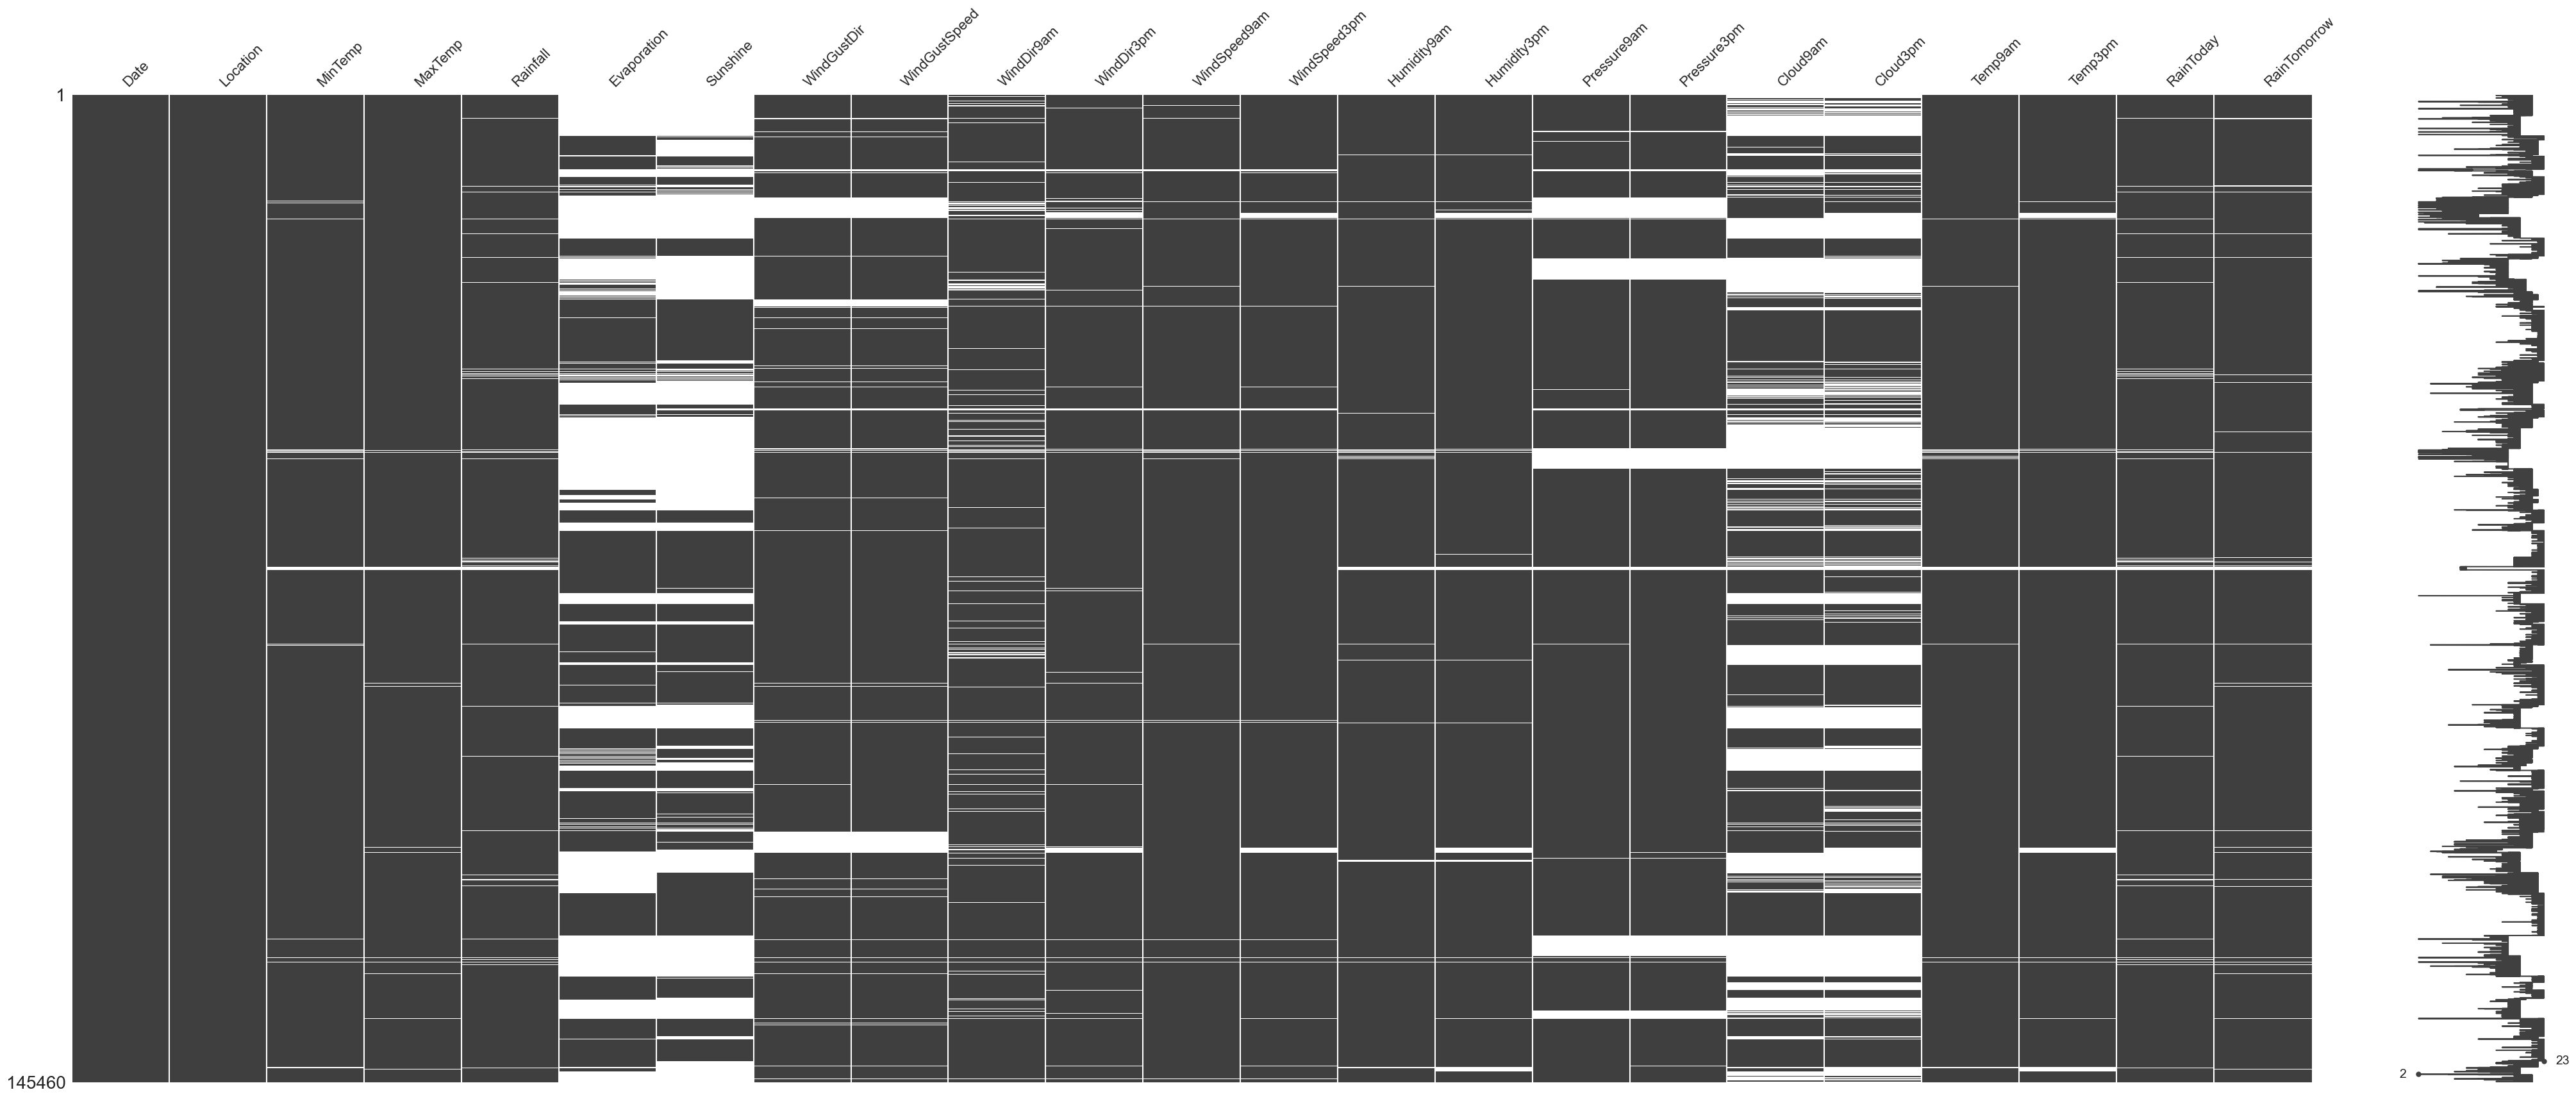

In [7]:
import missingno
missingno.matrix(df, figsize = (50, 20))

In [8]:
locations = df['Location'].unique()
locations

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Para buscar las locaciones en el geolocator API de Nominatim hay que separar los nombres con espacios.
 Ejemplo: 'AliceSprings' pasa a ser 'Alice Springs'

In [9]:
from utils import add_space_before_second_uppercase
formatted_locations = [add_space_before_second_uppercase(location) for location in locations]
print(formatted_locations)

['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree', 'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond', 'Sydney', 'Sydney Airport', 'Wagga Wagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'Mount Ginini', 'Ballarat', 'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'Gold Coast', 'Townsville', 'Adelaide', 'Mount Gambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'Pearce RAAF', 'Perth Airport', 'Perth', 'Salmon Gums', 'Walpole', 'Hobart', 'Launceston', 'Alice Springs', 'Darwin', 'Katherine', 'Uluru']


El siguiente codigo es para obtener latitud y longitud segun location y guardarlo en un archivo. Si ya esta generado el archivo, directamente lo lee.

```python
import time
from geopy.geocoders import Nominatim
import logging
logging.basicConfig(level=logging.DEBUG) # para ver el error
def get_location_coordinates():
    geolocator = Nominatim(user_agent="myGeocoderApp")
    loc_coordinates = {}

    for location, formatted_location in zip(locations, formatted_locations):
        coords = geolocator.geocode(formatted_location)
        if coords:
            loc_coordinates[location] = (coords.latitude, coords.longitude)
        else:
            print(location + " no fue encontrada.")

        # Se añade un retraso para evitar exceder los límites de solicitudes
        time.sleep(2)  # Espera 1 segundo entre solicitudes
    return loc_coordinates

import os.path
import json

def check_if_already_generated(file_path,generate_file):
    if not os.path.isfile(file_path): 
        with open(file_path, 'w') as f:
            try:
                file = generate_file()
                json.dump(file, f)
            except:
                print('API Error')
                os.remove(file_path)
    
    if os.path.isfile(file_path):
        with open(file_path) as f:
            ans = json.load(f)
        
    return ans

coordinates = check_if_already_generated("coordinates.json", get_location_coordinates)
```

Nominatim puede generar alguno de los siguientes problemas:

- Código de error HTTP 403 por la cantidad de solicitudes realizadas (es posible que la API al limitar el trafico bloquee a los usuarios por multiples request, el limite es 1 por segundo)
- Puede no encontrar la ubicación por no tratarse de una ciudad.
- Puede no encontrar la ubicación por no tener el formato solicitado.



Se pudo ejecutar al menos una vez por completo para obtener el siguiente archivo: 

In [10]:
import json
with open('coordinates.json', 'r') as file:
    coordinates = json.load(file)
coordinates

{'Albury': [-36.0801, 146.9128],
 'BadgerysCreek': [-33.8972, 150.6921],
 'Cobar': [-31.8495, 145.7791],
 'CoffsHarbour': [-30.2974, 153.1135],
 'Moree': [-29.4572, 149.8463],
 'Newcastle': [-32.9272, 151.7784],
 'NorahHead': [-33.2828, 151.547],
 'NorfolkIsland': [-29.0331, 167.959],
 'Penrith': [-33.7555, 150.6944],
 'Richmond': [-33.5951, 150.735],
 'Sydney': [-33.8688, 151.2093],
 'SydneyAirport': [-33.9399, 151.1753],
 'WaggaWagga': [-35.1084, 147.3737],
 'Williamtown': [-32.8153, 151.8314],
 'Wollongong': [-34.4278, 150.8931],
 'Canberra': [-35.2809, 149.13],
 'Tuggeranong': [-35.42, 149.1264],
 'MountGinini': [-35.5511, 148.7956],
 'Ballarat': [-37.5643, 143.8503],
 'Bendigo': [-36.758, 144.2808],
 'Sale': [-38.1014, 147.0668],
 'MelbourneAirport': [-37.6734, 144.843],
 'Melbourne': [-37.8136, 144.9631],
 'Mildura': [-34.19, 142.134],
 'Nhil': [-36.32, 140.69],
 'Portland': [-38.3519, 141.6008],
 'Watsonia': [-37.7246, 145.0962],
 'Dartmoor': [-37.5667, 141.35],
 'Brisbane': [-2

Nos aseguramos que todas las locations se encuentran en las coordenadas generadas. 

In [11]:
len(coordinates) == len(locations)

True

In [12]:
import folium
coord_values = [coords for coords in coordinates.values()]

# Calcular el centroide
mean_latitude = sum(lat for lat, lon in coord_values) / len(coord_values)
mean_longitude = sum(lon for lat, lon in coord_values) / len(coord_values)

# Crear el mapa centrado en el centroide
mymap = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=4)

# Graficar ciudades
for city, (lat, lon) in coordinates.items():
    if lat is not None and lon is not None:
        folium.Marker([lat, lon], popup=city).add_to(mymap)

/Users/jmestanza/ceia-tps/TP_AdD/tpf-add/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


De esta forma se puede ahora visualizar la cercanía entre ubicaciones, así también como su disposición geográfica.

- La primer relación es importante ya que es bastante verosimil que dos lugares cercanos experimenten lluvias simultáneamente o por lo menos, de forma cercana en el tiempo.
- La segunda de ellas es importante, ya que la altitud o la cercanía a zonas montañosas (en donde las nubes suelen descargar su humedad) así como también la cercanía al mar, pueden ser buenos indicadores, dadas ciertas condiciones, de que puede llover.

In [13]:
mymap

En este mapa se observa que hay una isla de Australia llamada Norfolk Island la cual no solo se encuentra alejado del resto de los puntos sino que tambien es distinta en cuanto al relieve. Es probable que los datos de Norforlk Island sean muy distintos a los de los de mas puntos.

Otro tipo de análisis, es sobre cada ubicación de forma independiente, tratando a los datos como parte de una serie temporal donde cada observación es un valor en el tiempo:

In [14]:
# Crear un diccionario para almacenar DataFrames por ubicación
dfs_by_location = {location: df[df['Location'] == location].copy() for location in locations}

# Se elimina la columna 'Location' ya que es redundante
for location in dfs_by_location:
    dfs_by_location[location].drop(columns=['Location'], inplace=True)

A continuación se muestran solo algunos de los resultados y para un período reducido en el tiempo, con el fin de que se pueda apreciar la información que proporcionan los gráficos a modo de ejemplo:

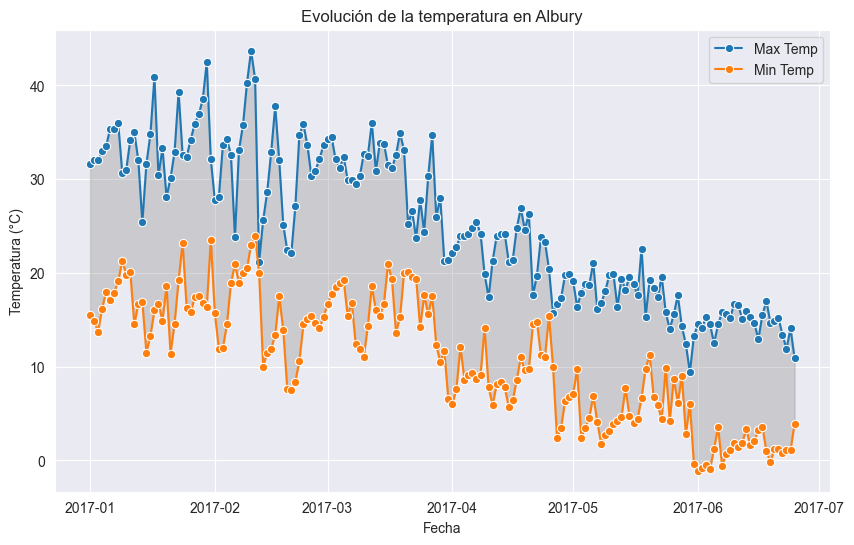

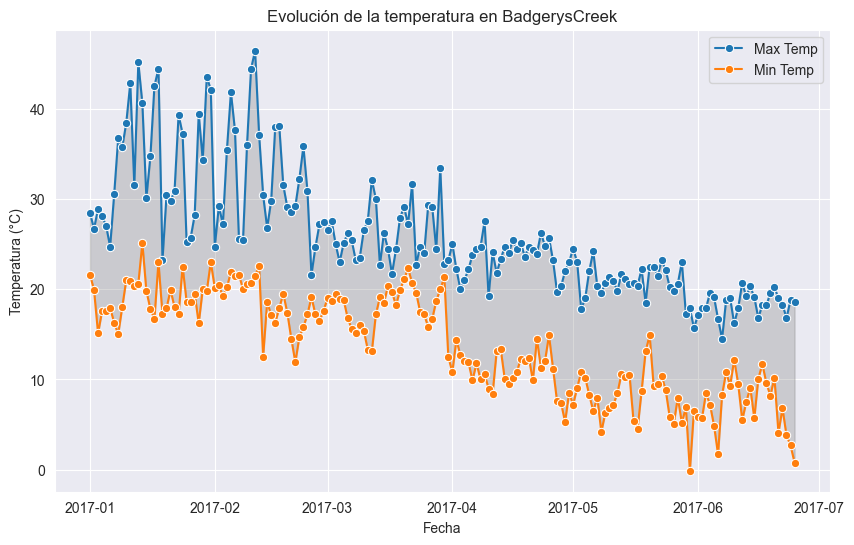

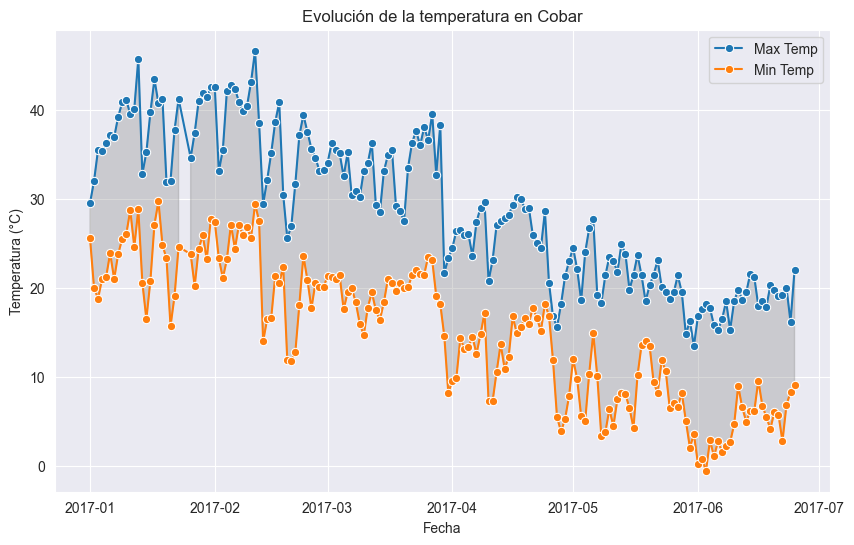

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Se define un intervalo arbitrario
start_date = '2017-01-01'
end_date = '2017-12-31'

# Se usan las primeras 3 ubicaciones
locations_to_plot = list(dfs_by_location.keys())[:3]

for location in locations_to_plot:
    location_df = dfs_by_location[location]
    
    plt.figure(figsize=(10, 6))
    
    # Se convierte la columna 'Date' a tipo datetime
    location_df['Date'] = pd.to_datetime(location_df['Date'])
    
    # Se ordena por fecha
    location_df = location_df.sort_values(by='Date')
    
    # Se filtra por el rango de fechas
    location_df = location_df[(location_df['Date'] >= start_date) & (location_df['Date'] <= end_date)]
    
    sns.lineplot(data=location_df, x='Date', y='MaxTemp', label='Max Temp', marker='o')
    sns.lineplot(data=location_df, x='Date', y='MinTemp', label='Min Temp', marker='o')

    # Se agrega sombreado para los valores medios de temperatura
    plt.fill_between(location_df['Date'], location_df['MinTemp'], location_df['MaxTemp'], color='gray', alpha=0.3)
    
    plt.title(f'Evolución de la temperatura en {location}')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    
    # Guardar la gráfica en un archivo
    # plt.savefig(f'{location}_temperature_evolution_seaborn.png')
    # plt.show()

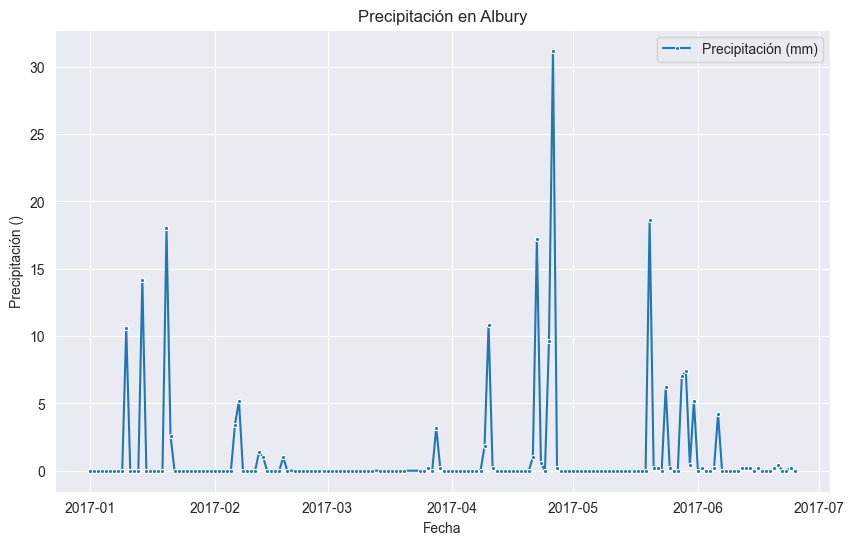

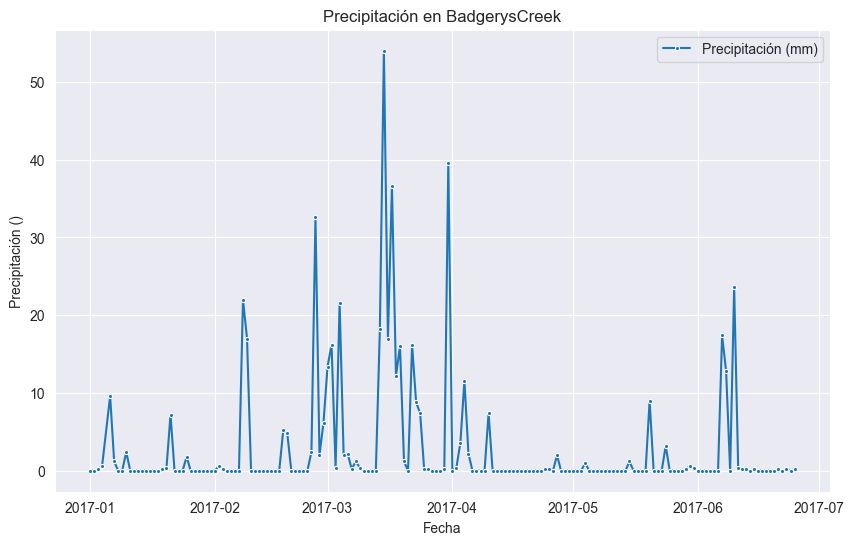

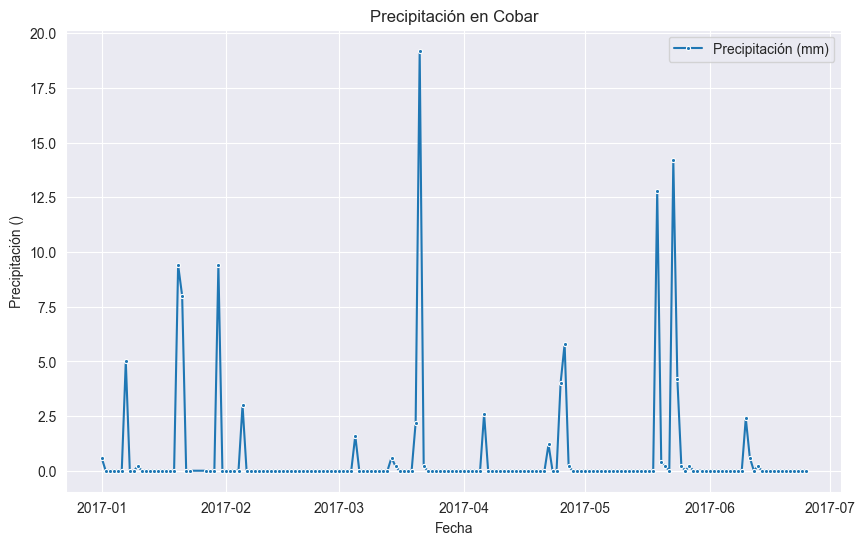

In [16]:
for location in locations_to_plot:
    location_df = dfs_by_location[location]
    
    plt.figure(figsize=(10, 6))
    
    # Se convierte la columna 'Date' a tipo datetime
    location_df['Date'] = pd.to_datetime(location_df['Date'])
    
    # Se ordena por fecha
    location_df = location_df.sort_values(by='Date')
    
    # Se filtra por el rango de fechas
    location_df = location_df[(location_df['Date'] >= start_date) & (location_df['Date'] <= end_date)]
    
    sns.lineplot(data=location_df, x='Date', y='Rainfall', label='Precipitación (mm)', marker='.')
    
    plt.title(f'Precipitación en {location}')
    plt.xlabel('Fecha')
    plt.ylabel('Precipitación ()')
    plt.legend()
    plt.grid(True)
    
    # Guardar la gráfica en un archivo
    # plt.savefig(f'{location}_temperature_evolution_seaborn.png')
    # plt.show()


Luego se pueden buscar distribuciones, tomando a Australia como objeto de estudio o cada locación por separado:


In [17]:
# Seleccionar las columnas numéricas relevantes para generar histogramas
numerical_columns = [
    'MinTemp',          # Temperatura mínima
    'MaxTemp',          # Temperatura máxima
    'Rainfall',         # Precipitación
    'Evaporation',      # Evaporación
    'Sunshine',         # Horas de sol
    'WindGustSpeed',    # Velocidad máxima del viento
    'WindSpeed9am',     # Velocidad del viento a las 9AM
    'WindSpeed3pm',     # Velocidad del viento a las 3PM
    'Humidity9am',      # Humedad a las 9AM
    'Humidity3pm',      # Humedad a las 3PM
    'Pressure9am',      # Presión a las 9AM
    'Pressure3pm',      # Presión a las 3PM
    'Temp9am',          # Temperatura a las 9AM
    'Temp3pm'           # Temperatura a las 3PM
]
len(numerical_columns)

14

In [18]:
from utils import plot_feature_histogram

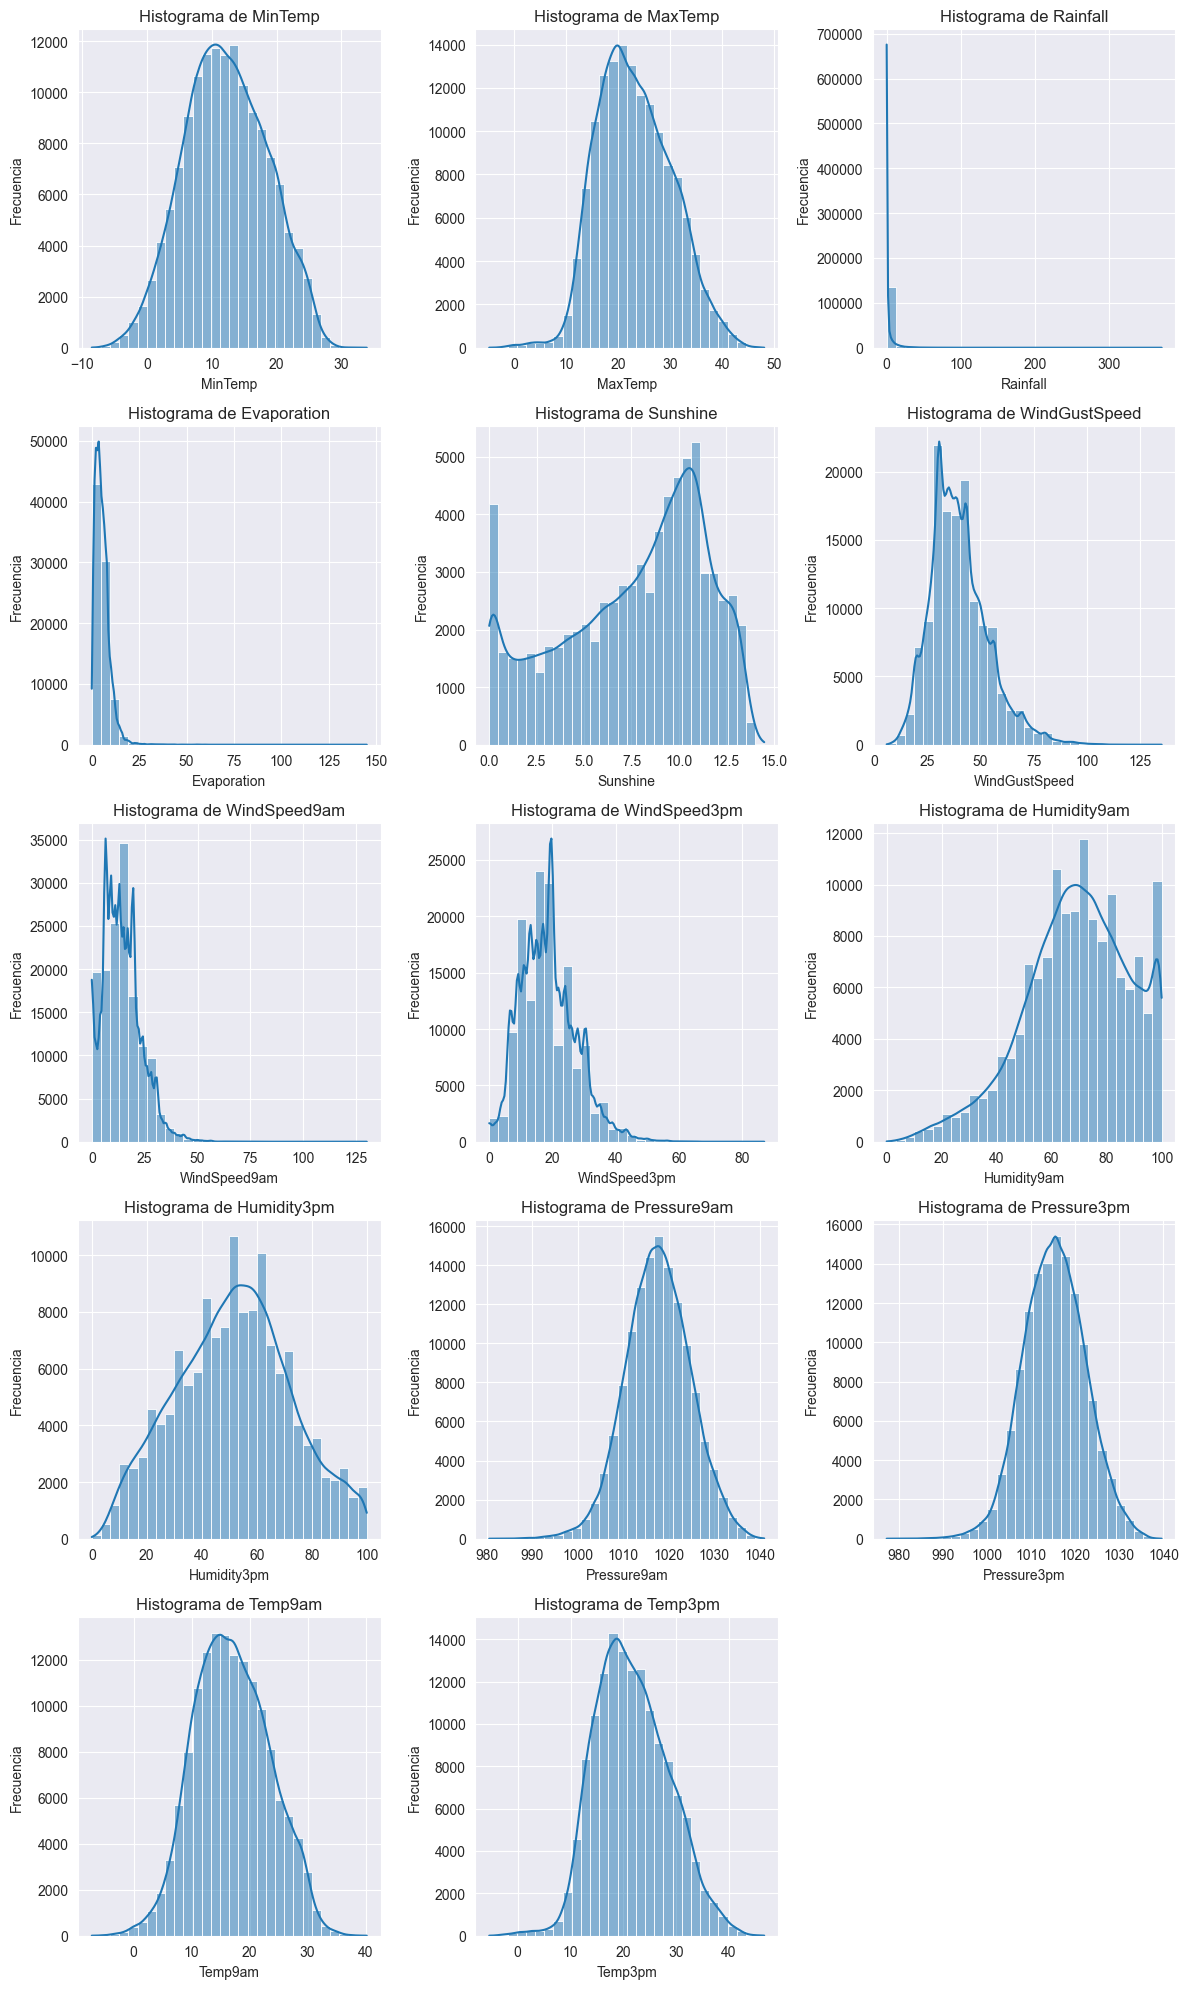

In [19]:
plot_feature_histogram(df, numerical_columns)

A continuación se muestran los histogramas para Albury:

La columna Evaporation no tiene datos válidos para graficar.
La columna Sunshine no tiene datos válidos para graficar.


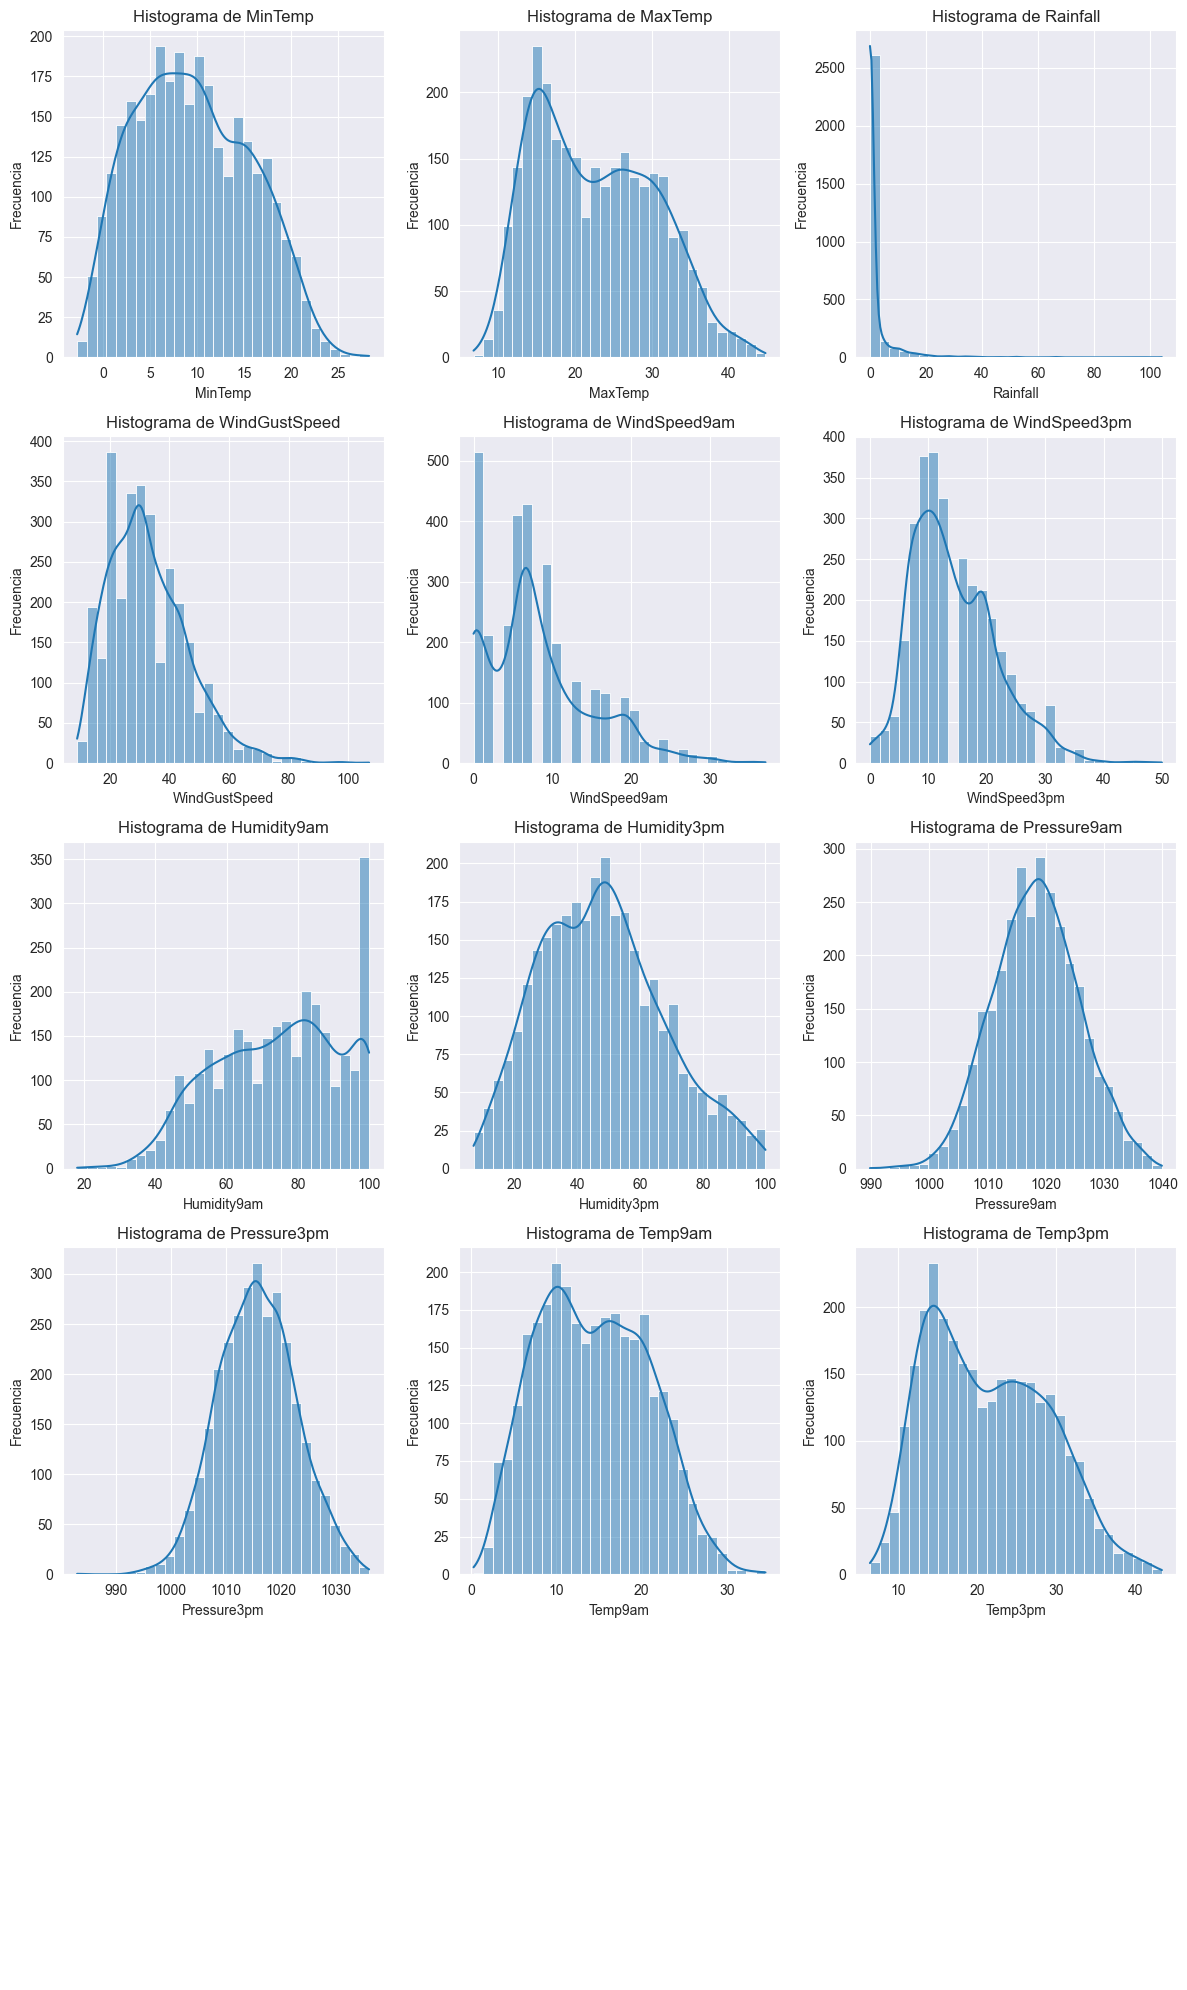

In [20]:
plot_feature_histogram(dfs_by_location["Albury"], numerical_columns)

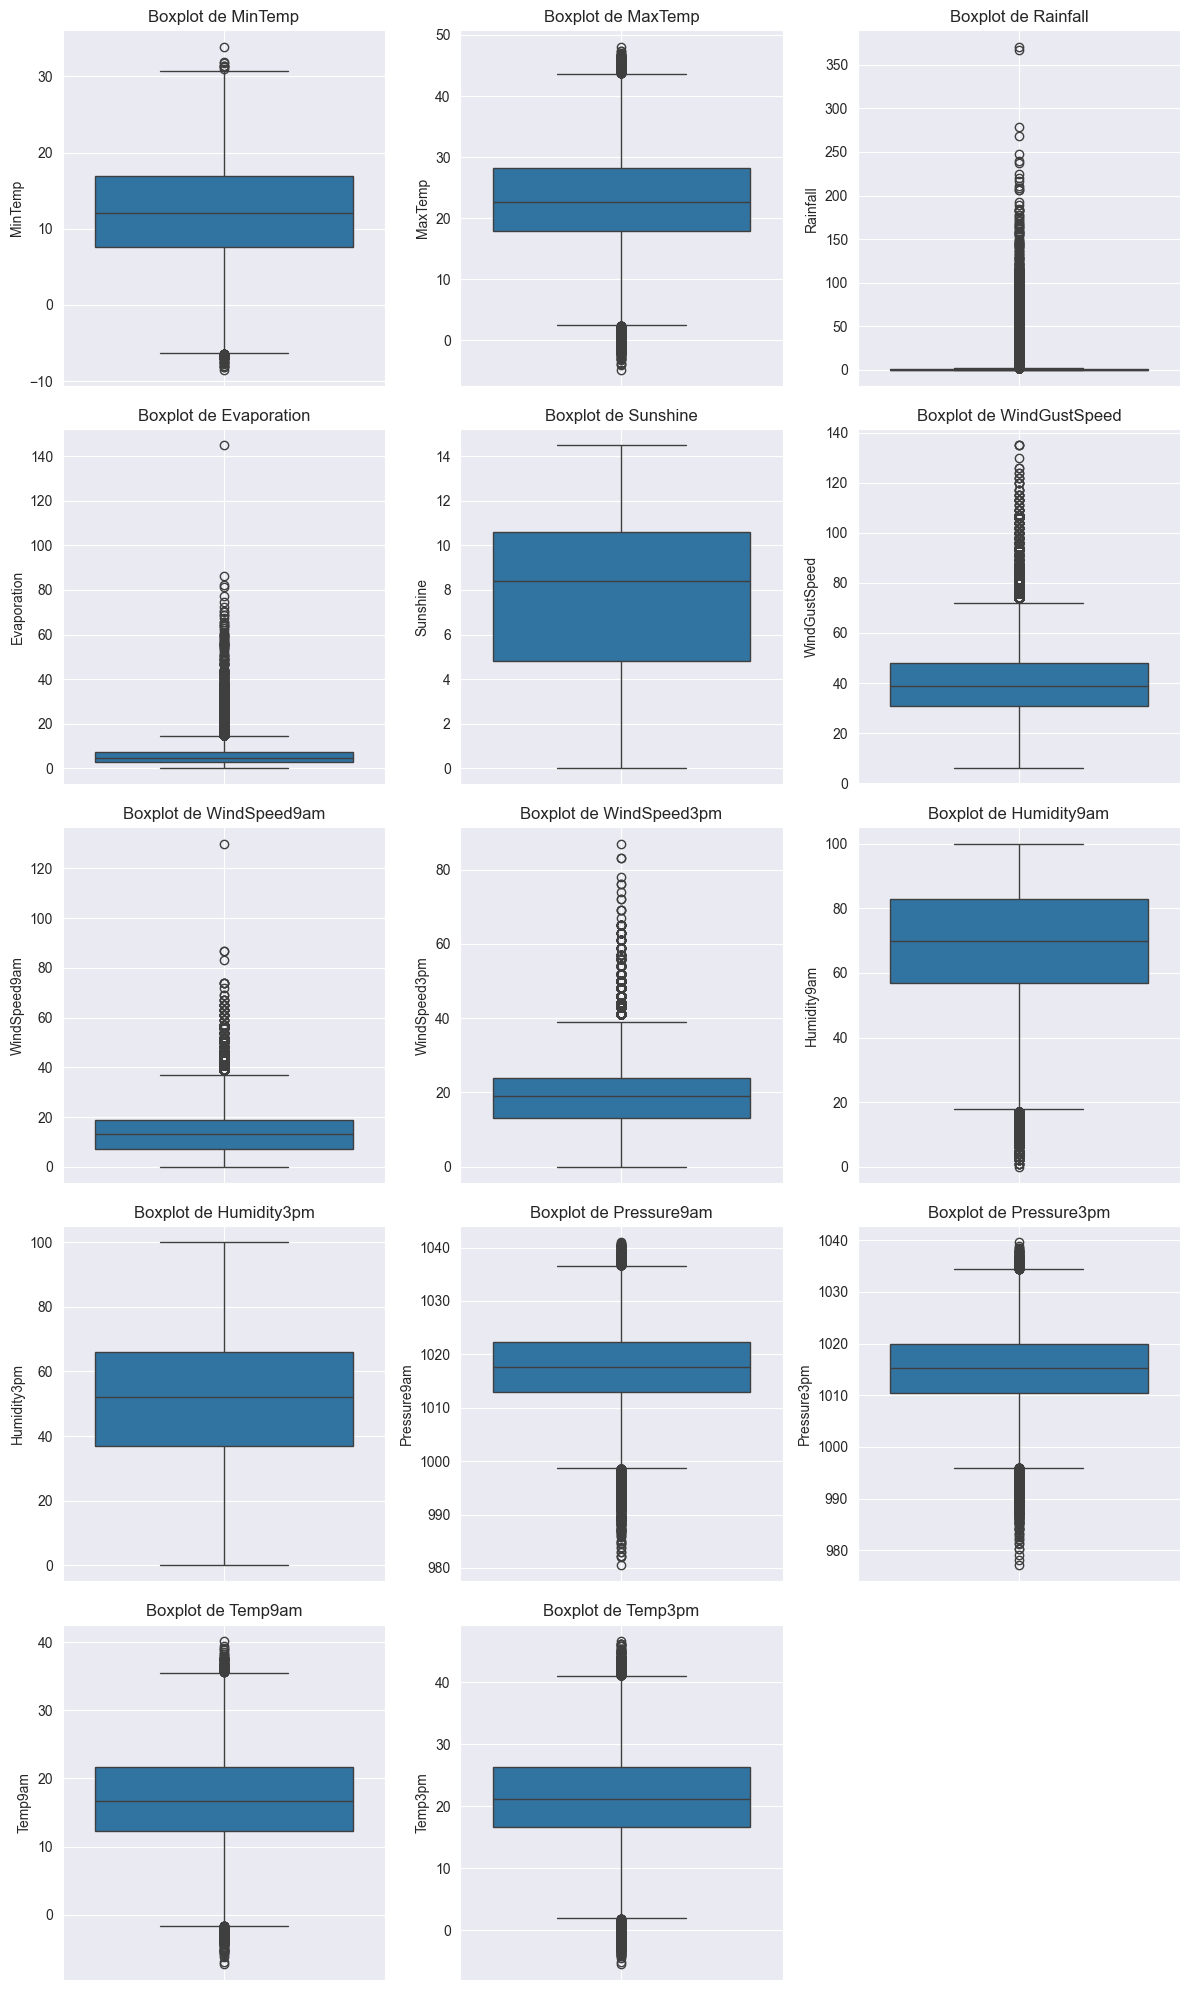

In [21]:
from utils import plot_feature_boxplot
plot_feature_boxplot(df, numerical_columns)

La columna Evaporation no tiene datos válidos para graficar.
La columna Sunshine no tiene datos válidos para graficar.


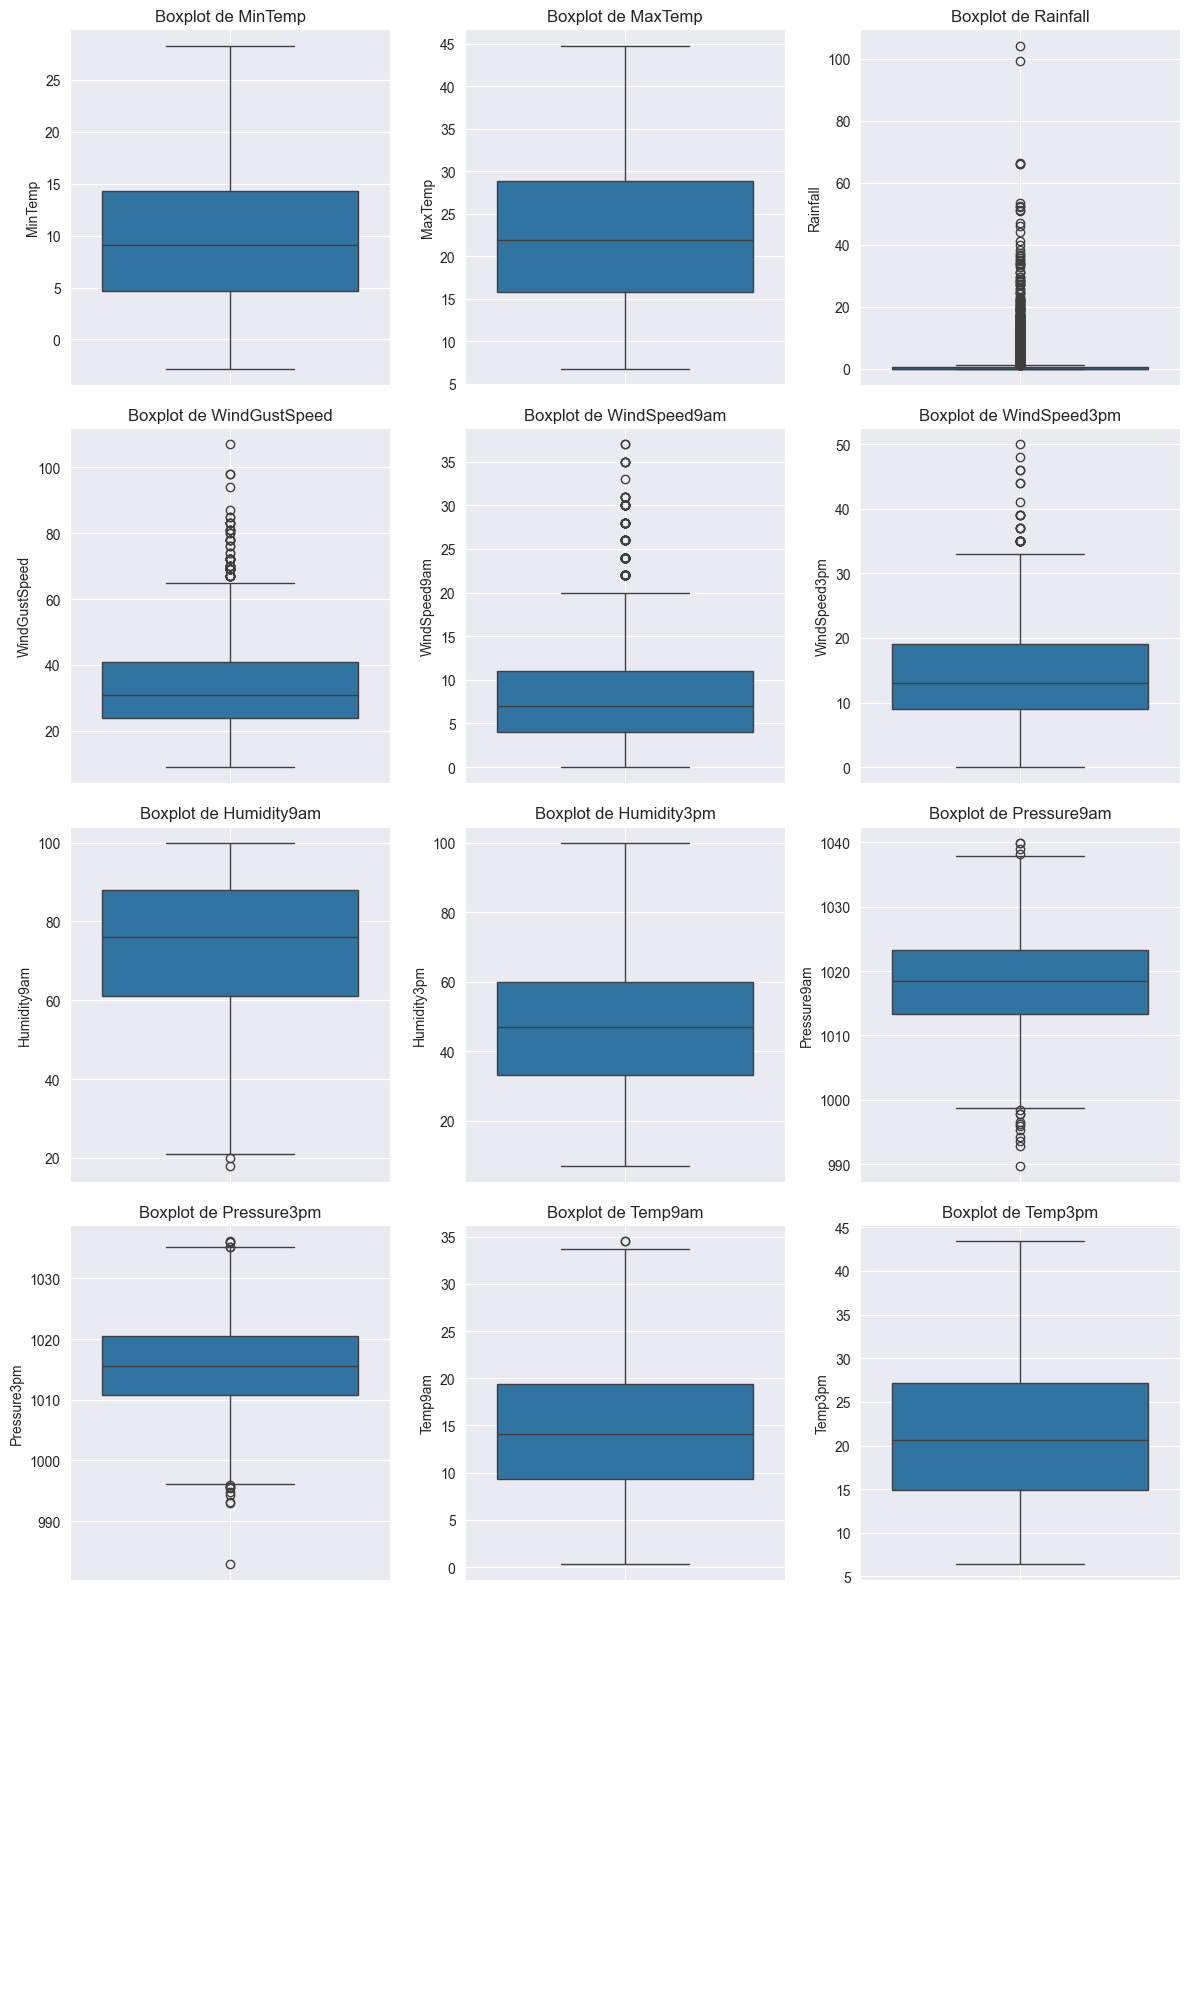

In [22]:
plot_feature_boxplot(dfs_by_location["Albury"], numerical_columns)

Se puede observar a continuación, que algunos features son categóricos. Otros, ordinales (algunos de los cuales, numéricos) pero como las posibilidades son limitadas, resulta más práctico realizar un conteo de los mismos.

In [23]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [24]:
df['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

In [25]:
df['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.])

In [26]:
df['WindSpeed9am'].unique()

array([ 20.,   4.,  19.,  11.,   7.,   6.,  15.,  17.,  28.,  24.,  nan,
         9.,   0.,  13.,   2.,  26.,  30.,  22.,  35.,  37.,  31.,  33.,
        48.,  39.,  44.,  43.,  41.,  46.,  56.,  83.,  74.,  52.,  65.,
        50., 130.,  54.,  61.,  57.,  59.,  87.,  67.,  63.,  69.,  72.])

In [27]:
# Lista de columnas categóricas (incluyendo 'Cloud9am' y 'Cloud3pm')
columns_to_plot_countplot = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm']

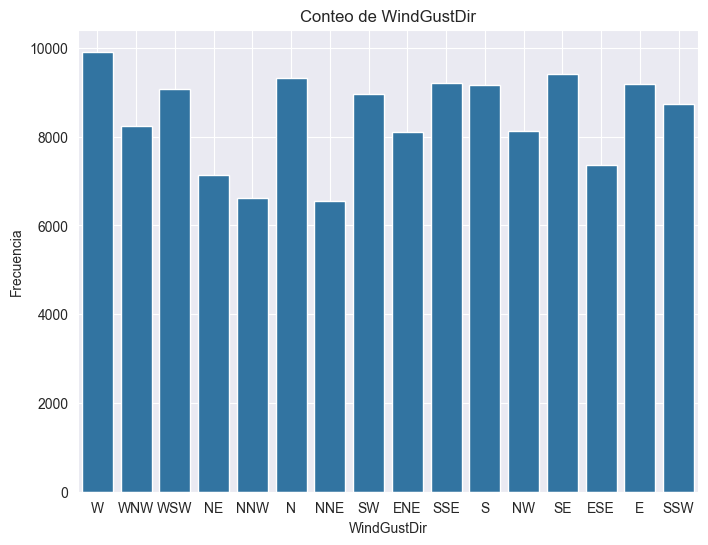

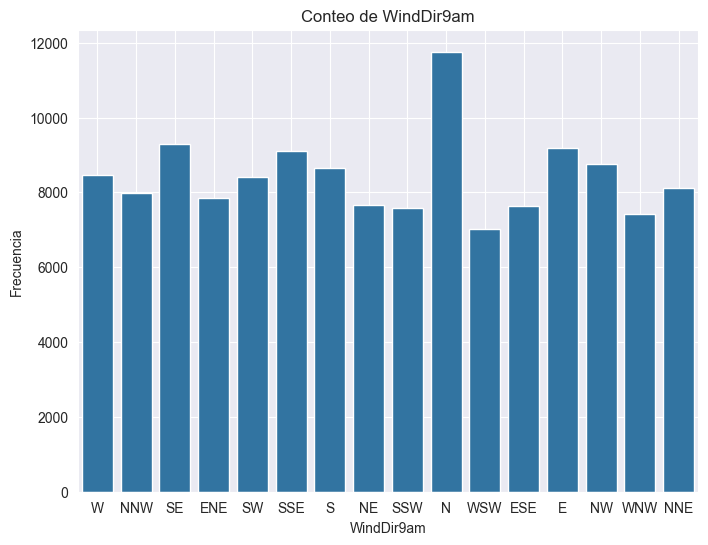

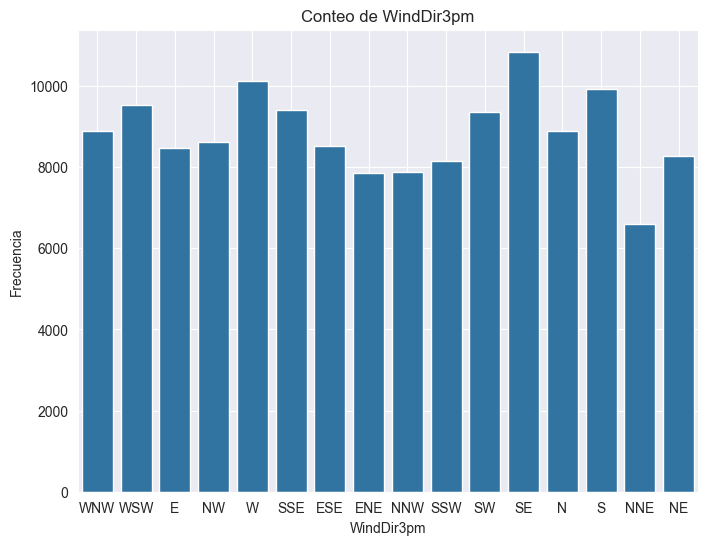

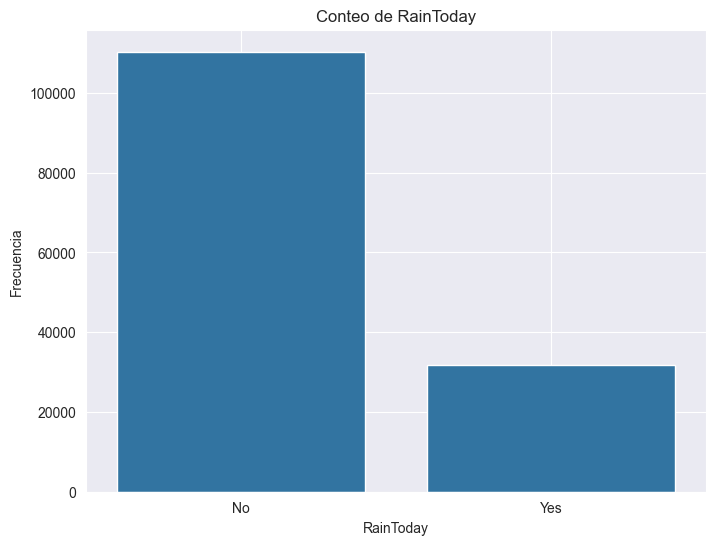

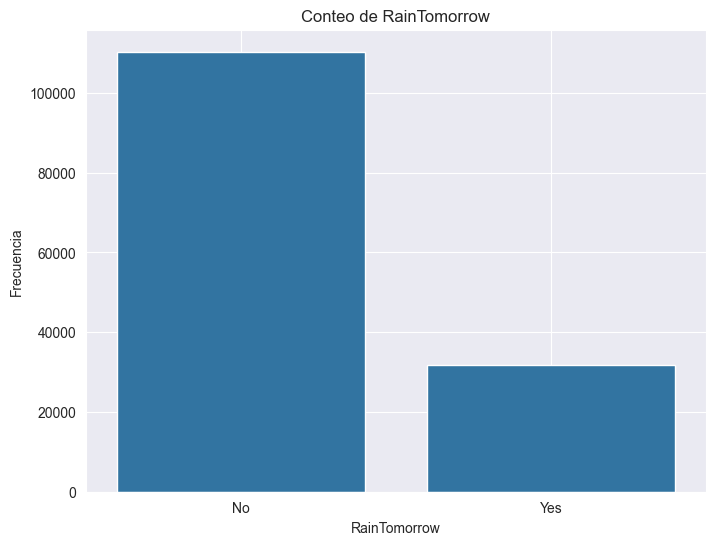

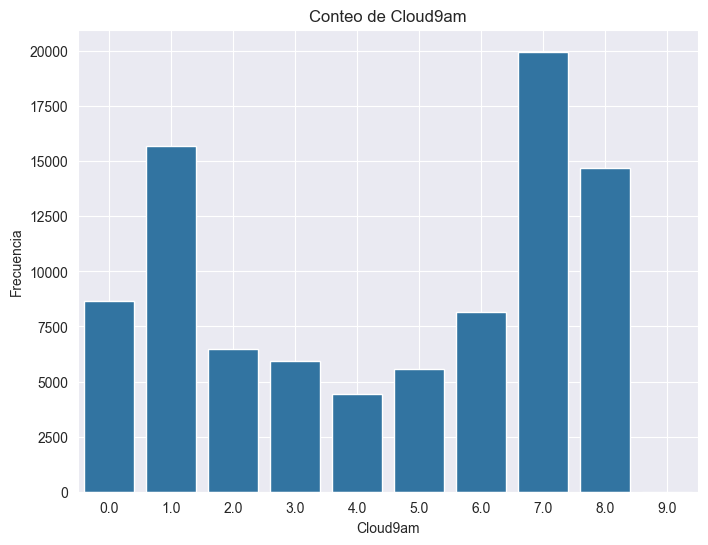

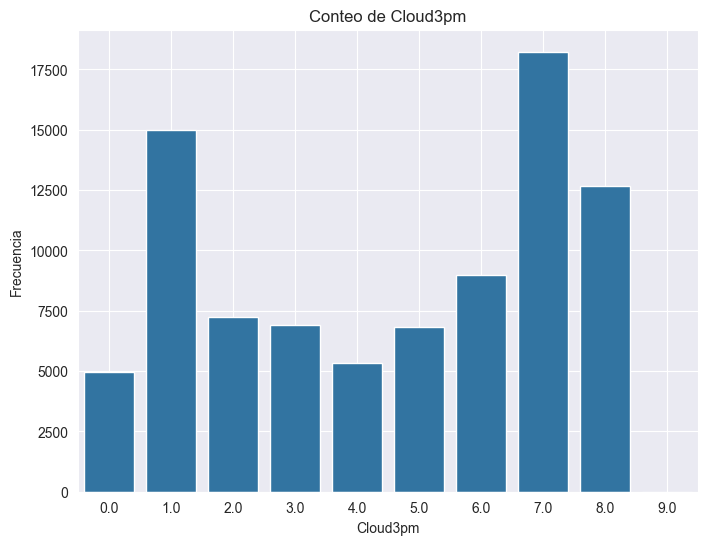

In [28]:
for column in columns_to_plot_countplot:
    plt.figure(figsize=(8, 6))
    
    if column in df.columns:
        sns.countplot(x=df[column].dropna())
        plt.title(f'Conteo de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    else:
        print(f"La columna {column} no está presente en el DataFrame.")

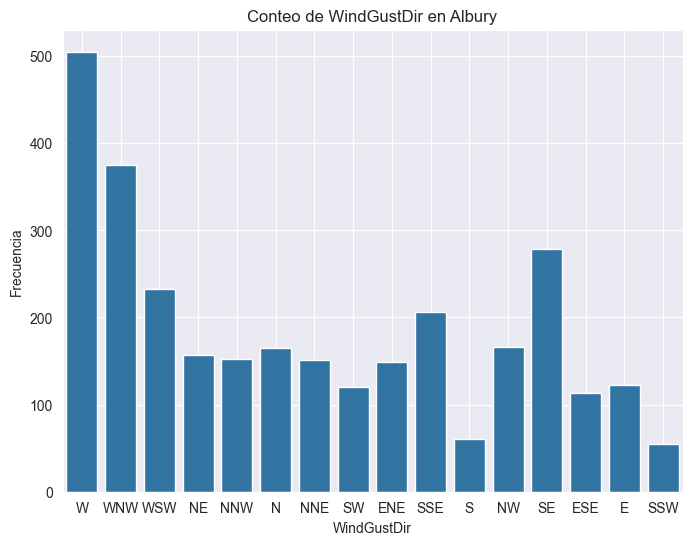

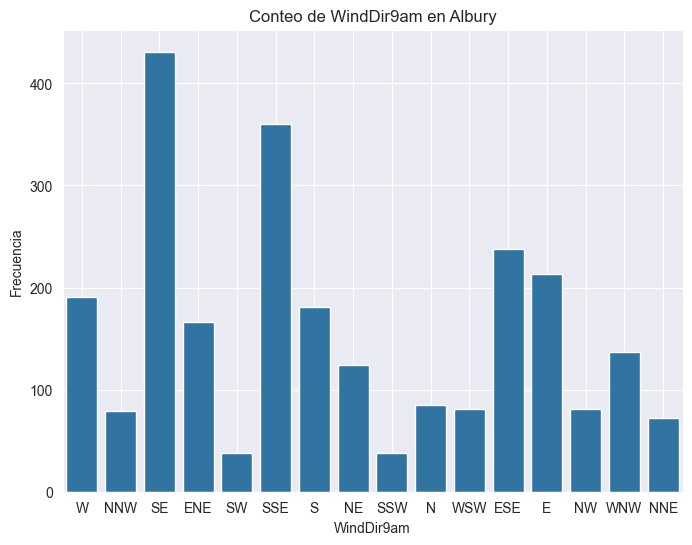

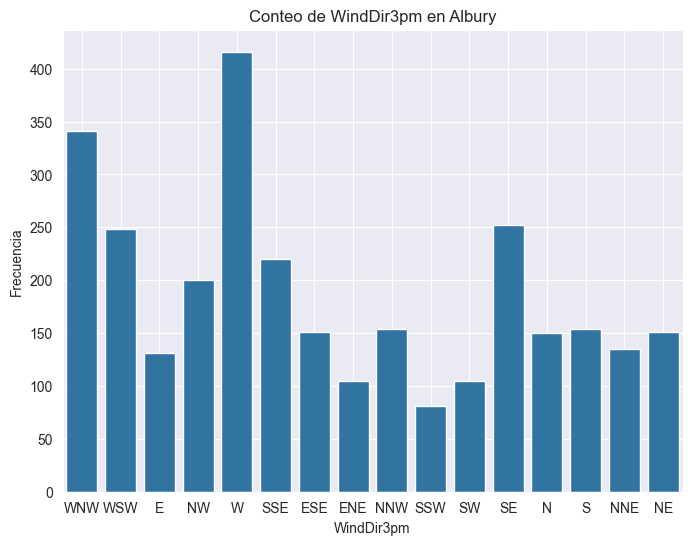

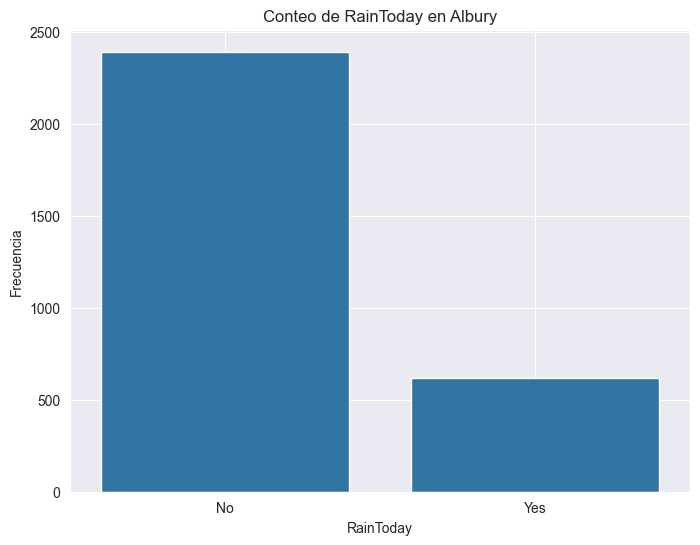

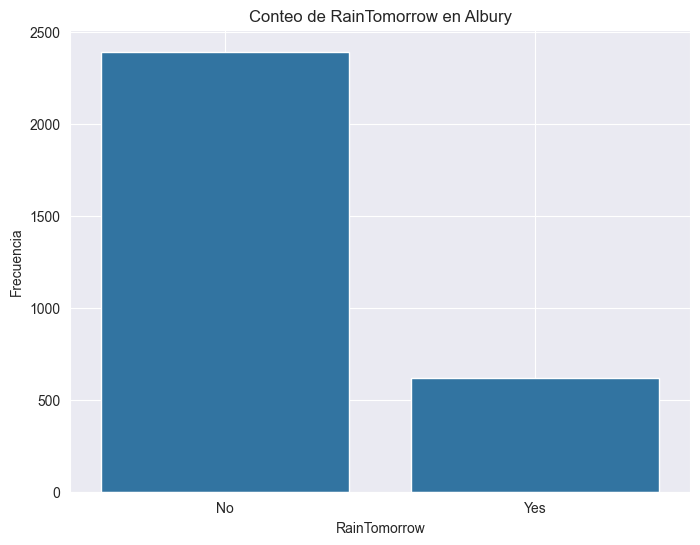

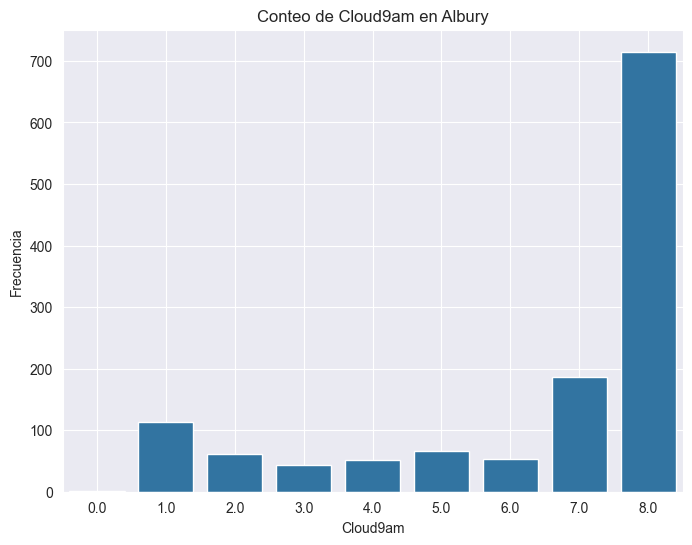

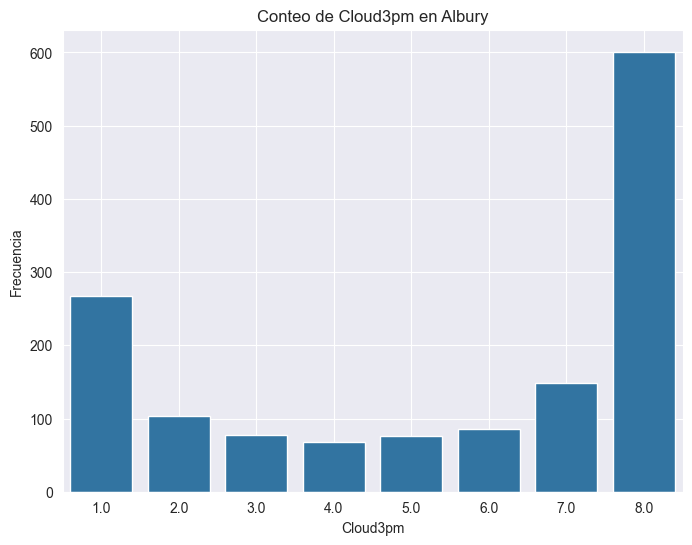

In [29]:
for column in columns_to_plot_countplot:
    plt.figure(figsize=(8, 6))
    
    if column in dfs_by_location['Albury'].columns:
        sns.countplot(x=dfs_by_location['Albury'][column].dropna())
        plt.title(f'Conteo de {column} en Albury')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    else:
        print(f"La columna {column} no está presente en el DataFrame.")

Hasta el momento no se ha tenido en cuenta las relaciones entre variables. Se propone ver las siguientes de ellas:

### MaxTemp vs. Sunshine:

La cantidad de horas de sol debería influir directamente en la temperatura máxima registrada en el día.

### Humidity3pm vs. RainTomorrow:

La humedad es un buen indicador de si va a llover. Altos niveles de humedad en la tarde podrían ser un predictor de lluvia al día siguiente.

### WindGustSpeed vs. Rainfall:

Las ráfagas de viento fuertes a menudo están asociadas con condiciones meteorológicas inestables, como tormentas.

### Pressure3pm vs. RainTomorrow:

La presión atmosférica baja es frecuentemente un indicador de mal tiempo. 

### Cloud9am vs. Temp9am:

Los días nublados suelen ser más frescos por la mañana debido a la menor radiación solar.

### Evaporation vs. Sunshine:

La evaporación está directamente influenciada por la radiación solar.

### WindSpeed9am vs. WindSpeed3pm:

Comparar la velocidad del viento en dos momentos del día podría revelar patrones diarios en la intensidad del viento, lo cual es útil para predecir tendencias a lo largo del día.

### Rainfall vs. RainTomorrow:

Se puede evaluar si la cantidad de lluvia caída hoy influye en la probabilidad de lluvia mañana.

### Temp9am vs. MaxTemp:

La temperatura a las 9 AM puede ser un buen predictor de la temperatura máxima del día. Esto puede ser útil para pronósticos de corto plazo basados en datos tempranos.


## MaxTemp vs. Sunshine

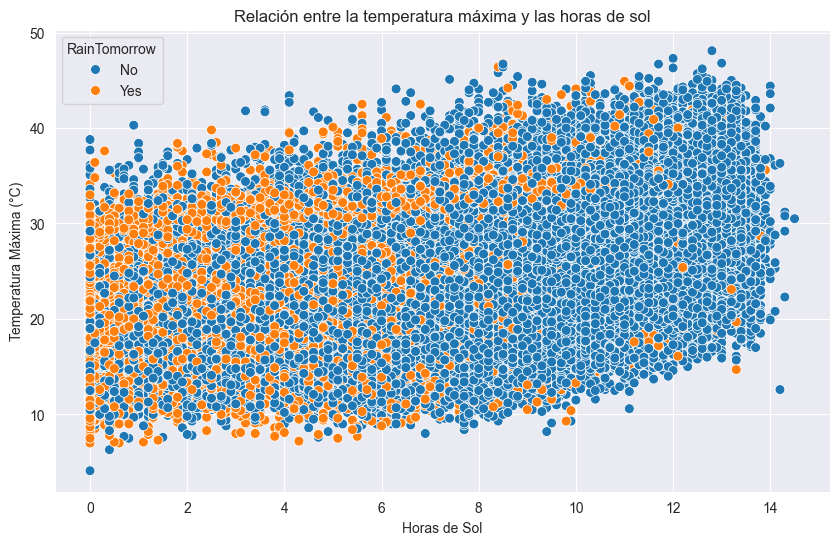

In [30]:
df_copy = df.copy()

# df_copy['MaxTemp'] = df_copy['MaxTemp'].interpolate(method='linear')
# df_copy['Sunshine'] = df_copy['Sunshine'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['MaxTemp', 'Sunshine'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Sunshine', y='MaxTemp', hue='RainTomorrow', s=50)
plt.title('Relación entre la temperatura máxima y las horas de sol')
plt.xlabel('Horas de Sol')
plt.ylabel('Temperatura Máxima (°C)')
plt.grid(True)
plt.show()

Hay una relación entre ambas variables aunque no está muy pronunciada. Por otro lado, se observa que a menor cantidad de horas de sol, mayor es la probabilidad de que llueva al día siguiente. A mayores temperaturas, también es más probable que el día siguiente llueva aunque es una relación más débil.

## Humidity3pm vs. RainTomorrow

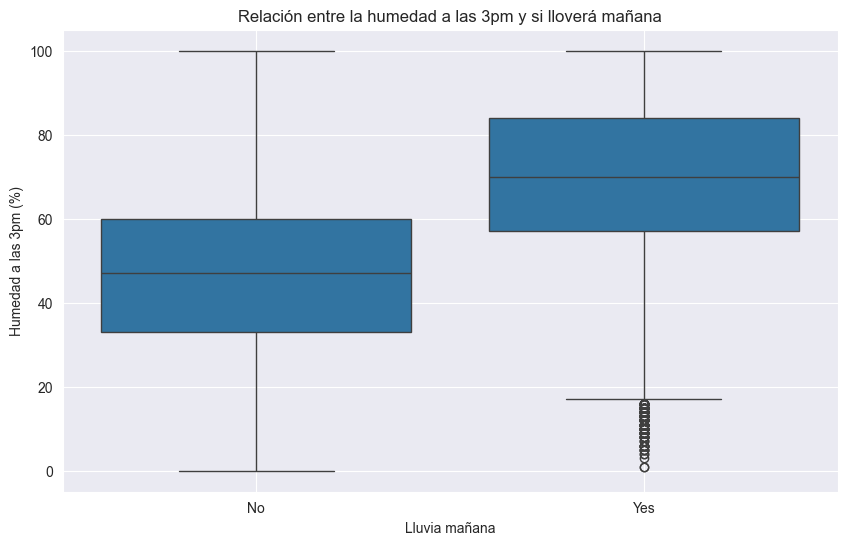

In [31]:
df_copy = df.copy()

# df_copy['Humidity3pm'] = df_copy['Humidity3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Humidity3pm', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='RainTomorrow', y='Humidity3pm')
plt.title('Relación entre la humedad a las 3pm y si lloverá mañana')
plt.xlabel('Lluvia mañana')
plt.ylabel('Humedad a las 3pm (%)')
plt.grid(True)
plt.show()

Aquí se observa una fuerte relación entre la humedad a las 3pm y el hecho de que precipite al otro día:

- Para los días en que lloverá al día siguiente, el rango intercuartil (IQR) de la humedad a las 3pm está aproximadamente entre 60% y 80%, lo que significa que el 50% central de los datos de humedad se encuentra en ese rango.
- Para los días en que no lloverá al día siguiente, el IQR de la humedad a las 3pm está aproximadamente entre 35% y 60%, lo que indica que el 50% central de la humedad en esos días tiene una humedad más baja.

### WindGustSpeed vs. Rainfall

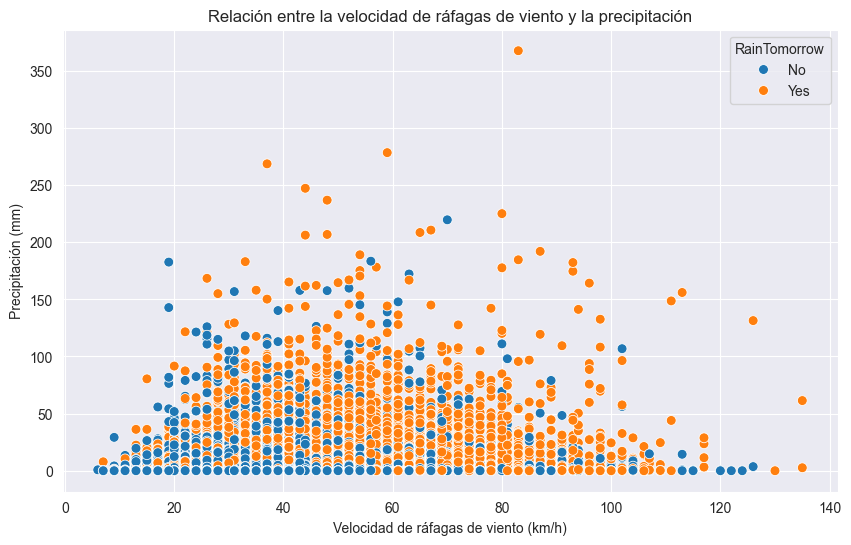

In [32]:
df_copy = df.copy()

# df_copy['WindGustSpeed'] = df_copy['WindGustSpeed'].interpolate(method='linear')
# df_copy['Rainfall'] = df_copy['Rainfall'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['WindGustSpeed', 'Rainfall'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='WindGustSpeed', y='Rainfall', hue='RainTomorrow', s=50)
plt.title('Relación entre la velocidad de ráfagas de viento y la precipitación')
plt.xlabel('Velocidad de ráfagas de viento (km/h)')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.show()

Aquí se observa que cuanto más crecen ambas variables, hay mayores chances de que precipite al día siguiente. Por otro lado, no se observa dependencia entre variables.

## Pressure9am vs. RainTomorrow

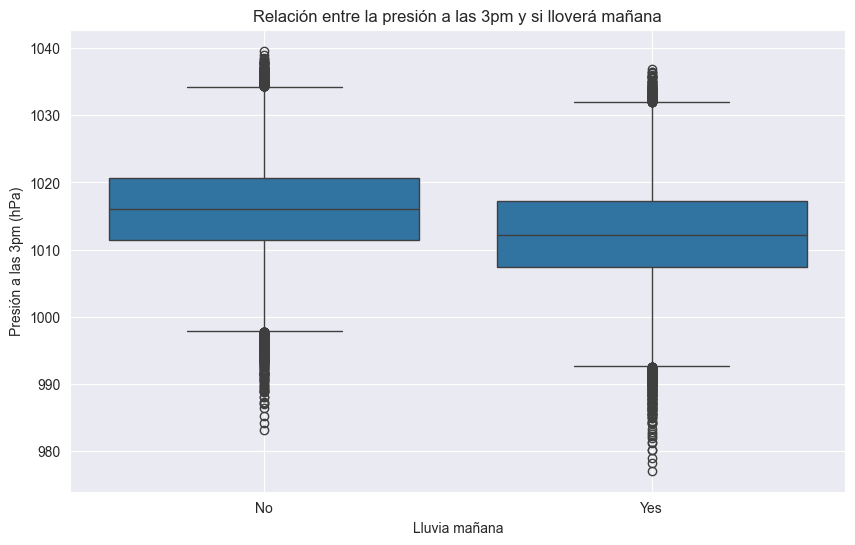

In [33]:
df_copy = df.copy()

# df_copy['Pressure3pm'] = df_copy['Pressure3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Pressure3pm', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='RainTomorrow', y='Pressure3pm')
plt.title('Relación entre la presión a las 3pm y si lloverá mañana')
plt.xlabel('Lluvia mañana')
plt.ylabel('Presión a las 3pm (hPa)')
plt.grid(True)
plt.show()

Debido a que existe una fuerte superposición de los rangos intercuartiles (IQR), la presión a las 3pm no parece ser un buen indicador. 

## Cloud9am vs. Temp9am

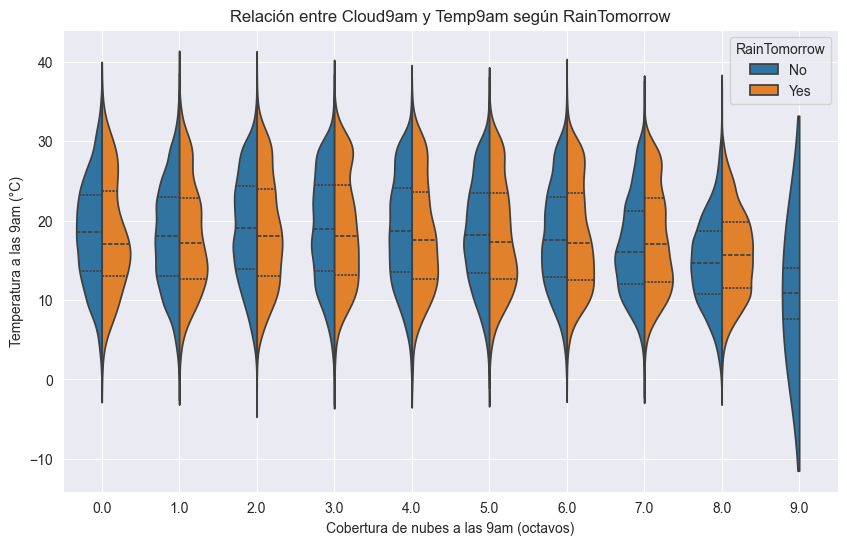

In [34]:
df_copy = df.copy()

# df_copy['Temp9am'] = df_copy['Temp9am'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud9am', 'Temp9am'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_copy, x='Cloud9am', y='Temp9am', hue='RainTomorrow', 
                split=True, inner='quartile')
plt.title('Relación entre Cloud9am y Temp9am según RainTomorrow')
plt.xlabel('Cobertura de nubes a las 9am (octavos)')
plt.ylabel('Temperatura a las 9am (°C)')
plt.grid(True)
plt.show()

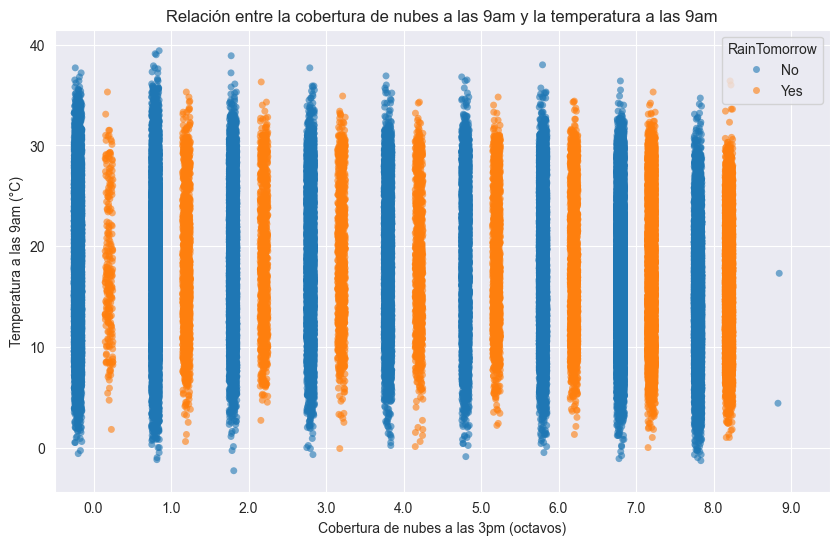

In [35]:
df_copy = df.copy()

# df_copy['Temp9am'] = df_copy['Temp9am'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud9am', 'Temp9am', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.stripplot(data=df_copy, x='Cloud9am', y='Temp9am', hue='RainTomorrow', dodge=True, size=5, alpha=0.6)
plt.title('Relación entre la cobertura de nubes a las 9am y la temperatura a las 9am')
plt.xlabel('Cobertura de nubes a las 3pm (octavos)')
plt.ylabel('Temperatura a las 9am (°C)')
plt.grid(True)
plt.show()

Se observa que la cobertura de nubes por la mañana suele ser un buen indicador de que al día siguiente no lloverá cuando el valor es 0.

Se procede a visualizar qué pasa luego a las 3pm para ver si existe mayor información una vez avanzado el día:

## Cloud3pm vs. Temp3pm

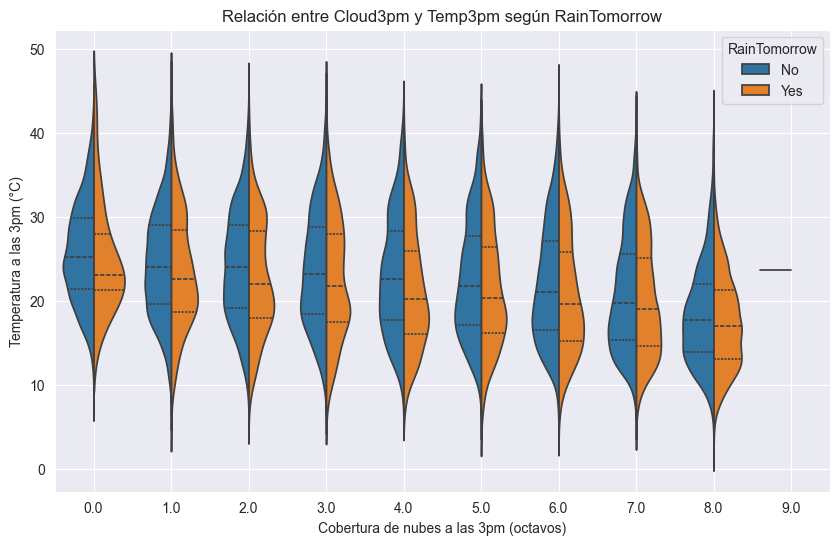

In [36]:
df_copy = df.copy()

# df_copy['Temp3pm'] = df_copy['Temp3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud3pm', 'Temp3pm'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_copy, x='Cloud3pm', y='Temp3pm', hue='RainTomorrow', 
                split=True, inner='quartile')
plt.title('Relación entre Cloud3pm y Temp3pm según RainTomorrow')
plt.xlabel('Cobertura de nubes a las 3pm (octavos)')
plt.ylabel('Temperatura a las 3pm (°C)')
plt.grid(True)
plt.show()

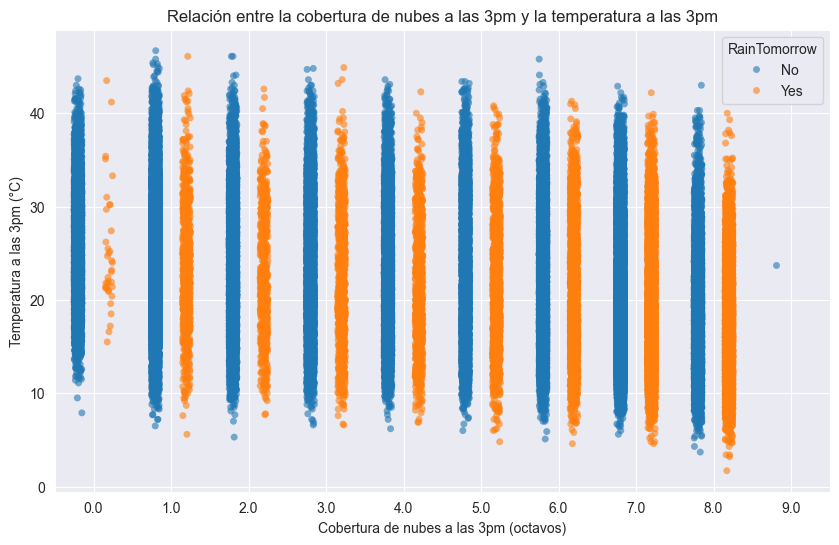

In [37]:
df_copy = df.copy()

# df_copy['Temp3pm'] = df_copy['Temp3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud3pm', 'Temp3pm', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.stripplot(data=df_copy, x='Cloud3pm', y='Temp3pm', hue='RainTomorrow', dodge=True, size=5, alpha=0.6)
plt.title('Relación entre la cobertura de nubes a las 3pm y la temperatura a las 3pm')
plt.xlabel('Cobertura de nubes a las 3pm (octavos)')
plt.ylabel('Temperatura a las 3pm (°C)')
plt.grid(True)
plt.show()

Se observa que la relación anteriormente mencionada se hace más fuerte aún.

## Evaporation vs. Sunshine

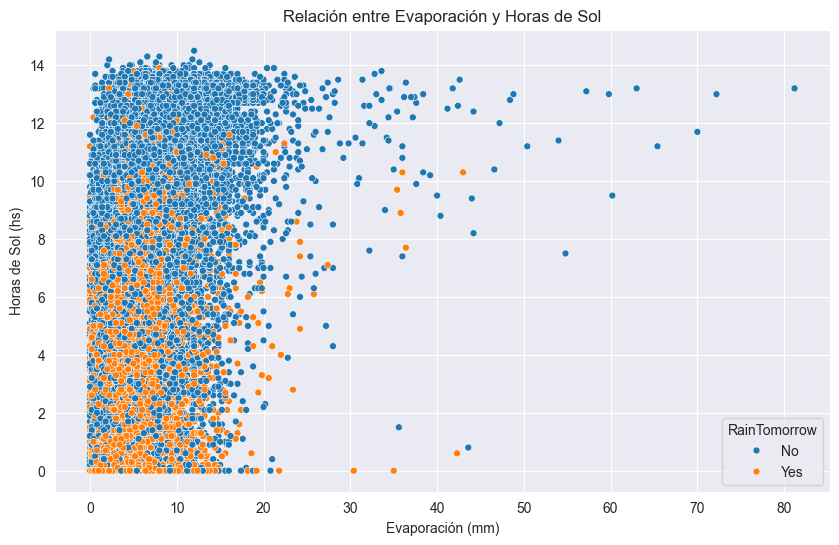

In [38]:
df_copy = df.copy()

# df_copy['Evaporation'] = df_copy['Evaporation'].interpolate(method='linear')
# df_copy['Sunshine'] = df_copy['Sunshine'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Evaporation', 'Sunshine'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Evaporation', y='Sunshine', hue='RainTomorrow', s=25)
plt.title('Relación entre Evaporación y Horas de Sol')
plt.xlabel('Evaporación (mm)')
plt.ylabel('Horas de Sol (hs)')
plt.grid(True)
plt.show()

Se observa que aumenta la _frecuencia de aparición de valores mayores_ de evaporación conforme aumentan las horas de sol. Así mismo, si hubo muchas horas de sol se observa que disminuyen las chances de que al día siguiente llueva.

## WindSpeed9am vs. WindSpeed3pm

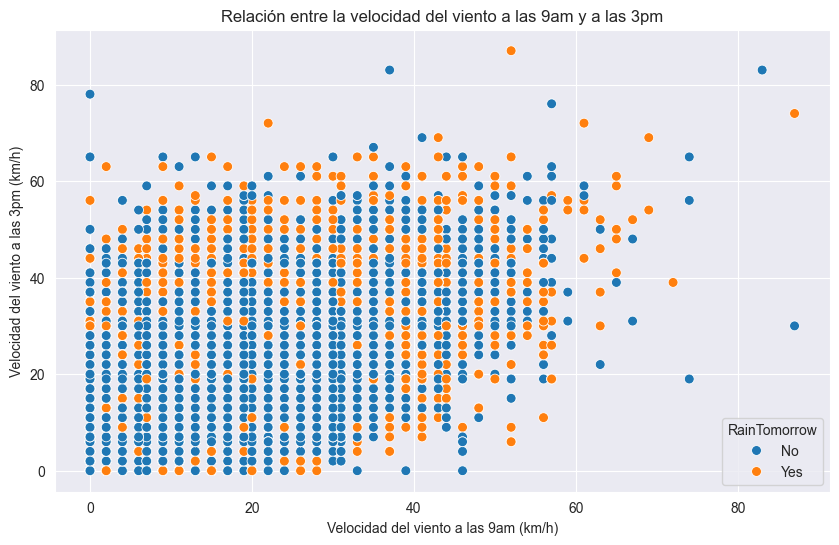

In [39]:
df_copy = df.copy()

# df_copy['WindSpeed9am'] = df_copy['WindSpeed9am'].interpolate(method='linear')
# df_copy['WindSpeed3pm'] = df_copy['WindSpeed3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['WindSpeed9am', 'WindSpeed3pm'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='WindSpeed9am', y='WindSpeed3pm', hue='RainTomorrow', s=50)
plt.title('Relación entre la velocidad del viento a las 9am y a las 3pm')
plt.xlabel('Velocidad del viento a las 9am (km/h)')
plt.ylabel('Velocidad del viento a las 3pm (km/h)')
plt.grid(True)
plt.show()

Aquí se observa que cuando la velocidad es baja tanto a las 9am como a las 3pm, las chances de que llueva al día siguiente son bajas.

## Rainfall vs. RainTomorrow

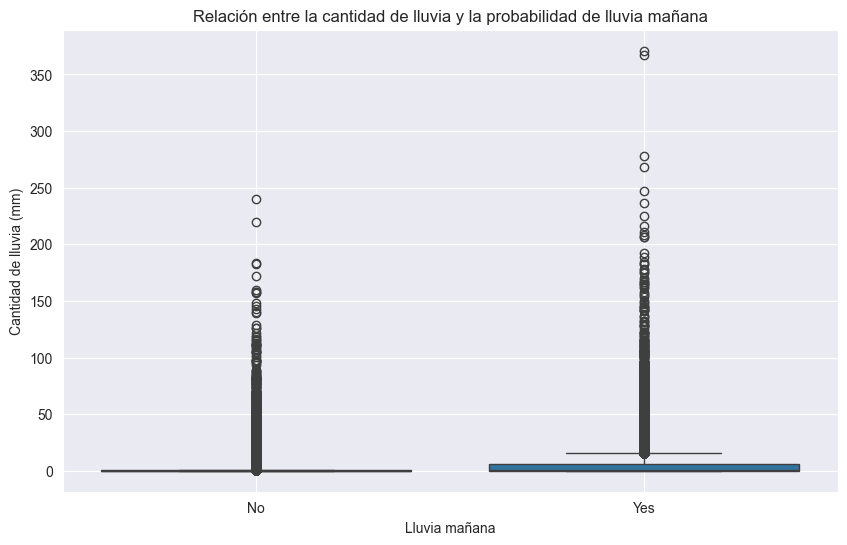

In [40]:
df_copy = df.copy()

# df_copy['Rainfall'] = df_copy['Rainfall'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Rainfall', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='RainTomorrow', y='Rainfall')
plt.title('Relación entre la cantidad de lluvia y la probabilidad de lluvia mañana')
plt.xlabel('Lluvia mañana')
plt.ylabel('Cantidad de lluvia (mm)')
plt.grid(True)
plt.show()

Éste gráfico muestra que la cantidad de lluvia del día actual es poco relevante para hacer inferencias sobre el día siguiente.

## Temp9am vs. MaxTemp

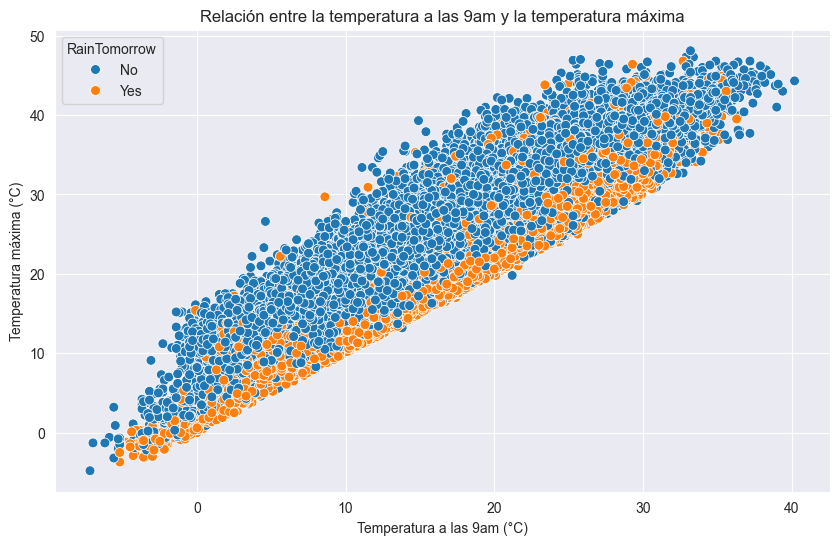

In [41]:
df_copy = df.copy()

# df_copy['Temp9am'] = df_copy['Temp9am'].interpolate(method='linear')
# df_copy['MaxTemp'] = df_copy['MaxTemp'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Temp9am', 'MaxTemp'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Temp9am', y='MaxTemp', hue='RainTomorrow', s=50)
plt.title('Relación entre la temperatura a las 9am y la temperatura máxima')
plt.xlabel('Temperatura a las 9am (°C)')
plt.ylabel('Temperatura máxima (°C)')
plt.grid(True)
plt.show()

Se observa una fuerte relación lineal entre variables. Ello podría servir por ejemplo, para imputar datos faltantes.

Si se considera a los ejes como abscisas y ordenadas, se puede observar que la recta y=x delimita inferiormente la posibilidad de tomar un valor. También se puede observar que cuando las observaciones son cercanas a esta recta, al día siguiente suele llover.

## Análisis de correlación en el tiempo

Se procede ahora a realizar un análisis que busca encontrar patrones temporales con respecto a precipitaciones en diferentes locaciones.

In [42]:
def custom_xcorr(series1, series2):
    # Convertir los valores 'Yes' y 'No' a 1 y 0
    series1 = series1.map({'Yes': 1, 'No': 0}).to_numpy()
    series2 = series2.map({'Yes': 1, 'No': 0}).to_numpy()
    
    # Calcular correlación cruzada usando numpy.correlate
    corr = np.correlate(series1, series2, mode='full')

    # Normalizar la correlación cruzada
    norm = np.sqrt(np.dot(series1, series1) * np.dot(series2, series2))
    corr_normalized = corr / norm if norm != 0 else 0
    
    return corr_normalized


In [43]:
from itertools import combinations

dfs_by_location_copy = dfs_by_location.copy()

# Se crean matrices vacías para almacenar las correlaciones y los lags
correlation_matrix = pd.DataFrame(index=locations, columns=locations, dtype=float)
lag_matrix = pd.DataFrame(index=locations, columns=locations, dtype=float)

for loc1, loc2 in combinations(locations, 2):
    df1 = dfs_by_location_copy[loc1]
    df2 = dfs_by_location_copy[loc2]

    df1 = df1.dropna(subset=['RainToday'])
    df2 = df2.dropna(subset=['RainToday'])

    df2.loc[:, 'Date'] = pd.to_datetime(df2['Date'])
    df1.loc[:, 'Date'] = pd.to_datetime(df1['Date'])

    # Se buscan fechas en común
    fechas_comunes = df1['Date'].isin(df2['Date'])
    fechas_comunes = df1['Date'][fechas_comunes]

    if len(fechas_comunes) > 0:
        df1_comun = df1[df1['Date'].isin(fechas_comunes)]
        df2_comun = df2[df2['Date'].isin(fechas_comunes)]

        correlacion = custom_xcorr(df1_comun['RainToday'], df2_comun['RainToday'])
        
        # Se obtiene el valor máximo de correlación y su desplazamiento (lag)
        max_corr = correlacion.max()
        best_lag = np.argmax(correlacion) - (len(df1_comun) - 1)
        
        correlation_matrix.loc[loc1, loc2] = max_corr
        correlation_matrix.loc[loc2, loc1] = max_corr

        lag_matrix.loc[loc1, loc2] = best_lag
        lag_matrix.loc[loc2, loc1] = -best_lag

    #     print(f"Máxima correlación entre {loc1} y {loc2}: {max_corr} con un desplazamiento de: {best_lag} días")
    # else:
    #     print(f"No hay fechas comunes entre {loc1} y {loc2}.")

np.fill_diagonal(correlation_matrix.values, 1)
np.fill_diagonal(lag_matrix.values, 0)

correlation_matrix_rounded = correlation_matrix.round(2).astype(str)

lag_matrix_int = lag_matrix.astype(int).astype(str)

combined_matrix = correlation_matrix_rounded + '\nL: ' + lag_matrix_int

plt.figure(figsize=(60, 48))
sns.heatmap(correlation_matrix, annot=combined_matrix, fmt='', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación Cruzada entre Locaciones', fontsize=20)
plt.savefig('matriz_correlacion.svg', format='svg', bbox_inches='tight')
plt.savefig('matriz_correlacion.pdf', format='pdf', bbox_inches='tight')
plt.close()

## Análisis de outliers

En esta seccion se investigaran dos criterios para la identificacion de outliers: 
- IQR
- Z-score

### Tecnica de IQR:

In [44]:
df_without_missings = df.dropna() # drops nan but makes a copy

def get_outliers(_df):
    Q1 = _df.quantile(0.25)
    Q3 = _df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (_df < lower_bound) | (_df > upper_bound)

In [45]:
df_without_missings[numerical_columns].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      13.464770     24.219206      2.130397      5.503135      7.735626   
std        6.416689      6.970676      7.014822      3.696282      3.758153   
min       -6.700000      4.100000      0.000000      0.000000      0.000000   
25%        8.600000     18.700000      0.000000      2.800000      5.000000   
50%       13.200000     23.900000      0.000000      5.000000      8.600000   
75%       18.400000     29.700000      0.600000      7.400000     10.700000   
max       31.400000     48.100000    206.200000     81.200000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean       40.877366     15.667228     19.786778     65.874123     49.601985   
std        13.335232      8.317005      8.510180     18.513289     20.197040   
min         9.000000      2.000000      2.000000      0.000000      0.000000   
25%        31.000000      9.000000     13.000000     55.000000     35.000000   
50%        39.000000     15.000000     19.000000     67.000000     50.000000   
75%        48.000000     20.000000     26.000000     79.000000     63.000000   
max       124.000000     67.000000     76.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm       Temp9am       Temp3pm  
count  56420.000000  56420.000000  56420.000000  56420.000000  
mean    1017.239505   1014.795580     18.204961     22.710333  
std        6.909357      6.870892      6.567991      6.836543  
min      980.500000    977.100000     -0.700000      3.700000  
25%     1012.700000   1010.100000     13.100000     17.400000  
50%     1017.200000   1014.700000     17.800000     22.400000  
75%     1021.800000   1019.400000     23.300000     27.900000  
max     1040.400000   1038.900000     39.400000     46.100000

In [46]:
outliers = get_outliers(df_without_missings[numerical_columns])
sorted_outliers = pd.DataFrame({'dataset percentage': 100*outliers.sum()/len(df)})
sorted_outliers.sort_values(by='dataset percentage', ascending=False)

dataset percentage
Rainfall                 7.764334
WindGustSpeed            0.947339
Evaporation              0.845593
WindSpeed9am             0.741097
Humidity9am              0.602227
Pressure9am              0.431734
Pressure3pm              0.322425
WindSpeed3pm             0.259178
Temp3pm                  0.011000
MaxTemp                  0.006187
Temp9am                  0.002750
MinTemp                  0.000687
Sunshine                 0.000000
Humidity3pm              0.000000

En principio se observa en los histograma dibujados previamente que Rainfall y Evaporation son las dos features que podrían presentar Outliers. Ahora, con el metodo de IQR, vemos que los dos son estan entre los primeros pero resulta que WindGustSpeed tambien. 

Ahora que lo vemos en formato lista (despues de remover los na), vemos que es asi pero aparecieron mas features con outliers. 

De todas formas haremos un breve estudio de esas dos features a continuación.

In [47]:
total = len(df)
total

145460

In [48]:
df_rainfall_filtered = df[df['Rainfall'] < 15]
count_rainfall_filtered = len(df_rainfall_filtered)
print(f'Rainfall filtrado por outliers representa el: {100*count_rainfall_filtered/total:.2f}% de los datos')

Rainfall filtrado por outliers representa el: 93.58% de los datos


In [49]:
df['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

In [50]:
df_evaporation_filtered = df[df['Evaporation'] < 25]
count_evaporation_filtered = len(df_evaporation_filtered)
print(f'Evaporation filtrado por outliers representa el: {100*count_evaporation_filtered/total:.2f}% de los datos')
len(df)

Evaporation filtrado por outliers representa el: 56.61% de los datos


145460

Esta cuenta no tiene sentido por lo que analizaremos si Evaporation tiene Nan values.


In [51]:
df_evap_without_na = df['Evaporation'].dropna().to_frame()
df_evaporation_filtered = df_evap_without_na[df_evap_without_na['Evaporation'] < 15]
count_evaporation_filtered = len(df_evaporation_filtered)
print(f'Evaporation filtrado por outliers representa el: {100*count_evaporation_filtered/len(df_evap_without_na):.2f}% de los datos')
len(df_evap_without_na)

Evaporation filtrado por outliers representa el: 97.74% de los datos


82670

Se puede ver que por inspeccion al menos 50% del dataset tiene nulls en 'Evaporation'. Sin embargo, podemos mejorar los graficos eliminando outliers despues de estos analisis.

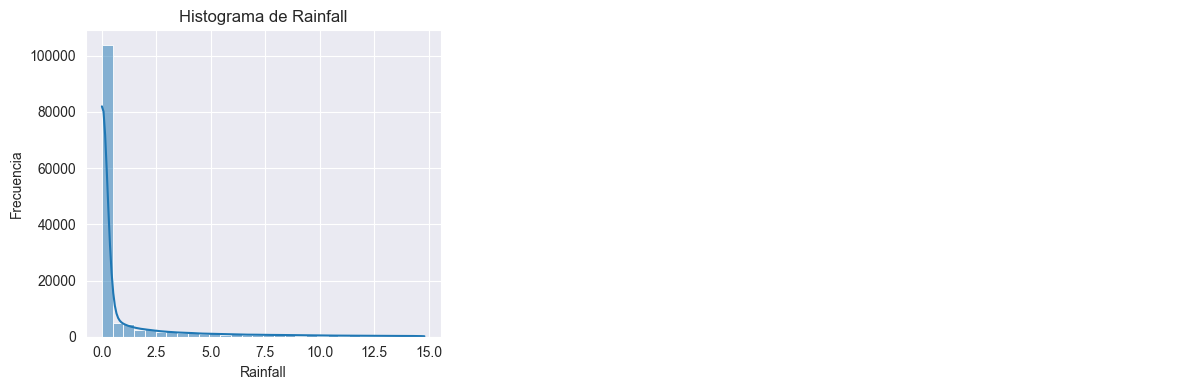

In [52]:
plot_feature_histogram(df_rainfall_filtered, ['Rainfall'])

Se procede a graficar Rainfall filtrado pero sin el valor 0.

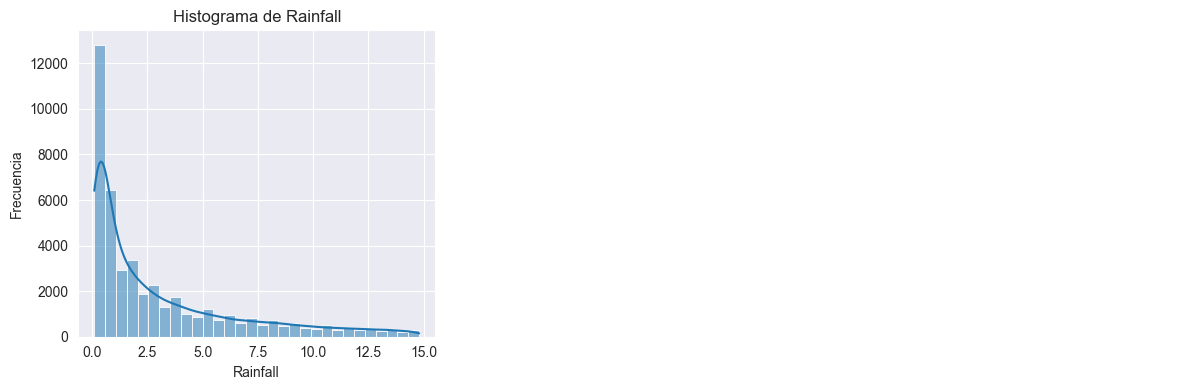

In [53]:
rainfall_cpy = df[(0 < df['Rainfall']) & (df['Rainfall'] < 15) ]
plot_feature_histogram(rainfall_cpy, ['Rainfall'])

Vemos que la grafica es mucho mas clara ahora, eso se debe a que 0 en realidad se da en muchos casos, opacando los otros valores. En algun sentido se puede pensar como un valor de saturacion.

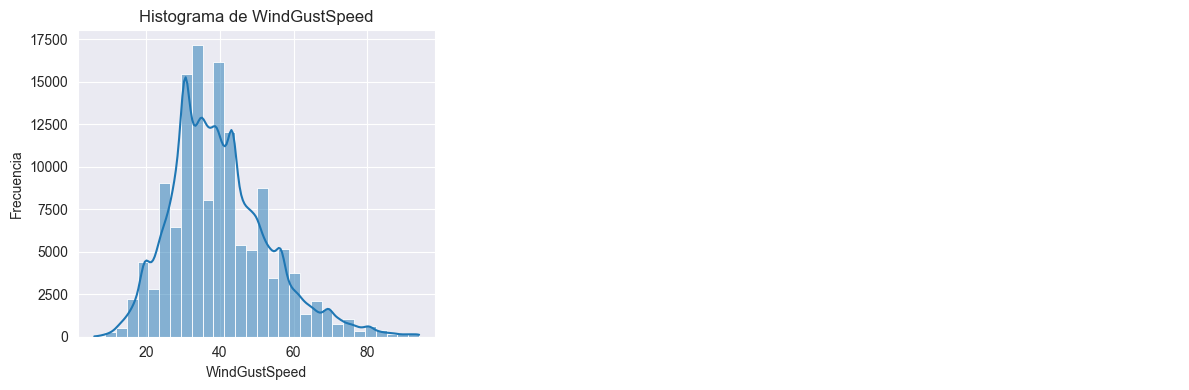

In [54]:
plot_feature_histogram(df[df['WindGustSpeed'] < 95], ['WindGustSpeed'])

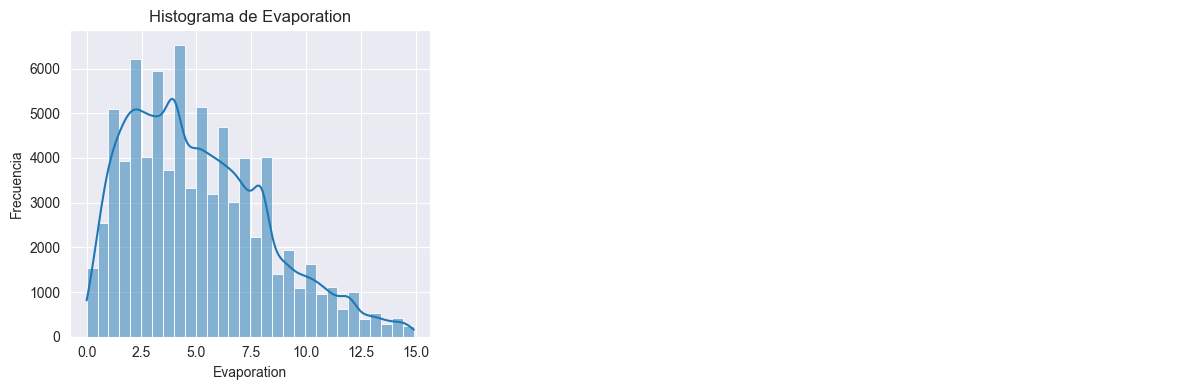

In [55]:
plot_feature_histogram(df_evaporation_filtered, ['Evaporation'])

Ahora se puede visualizar mejor la distribucion de las features.
En el caso de Evaporation es claro que un camino podria ser eliminar esos outliers. 
Por otro lado en rainfall perdemos bastante del dataset (mas del 5%), lo cual muchas veces no suele ser lo mas optimo.

### Tecnica Z-scores

In [56]:
# Calculate Z-scores

z_score = (df_without_missings[numerical_columns] - df_without_missings[numerical_columns].mean()) / df_without_missings[numerical_columns].std()

# Set threshold for z-score (e.g., 3 standard deviations)
threshold = 3

z_outliers = pd.DataFrame({'dataset percentage': 100*((np.abs(z_score) > threshold).sum())/len(df)})
z_outliers.sort_values(by='dataset percentage', ascending=False)

dataset percentage
Rainfall                 0.798845
WindGustSpeed            0.437234
WindSpeed9am             0.432421
Evaporation              0.340300
WindSpeed3pm             0.259178
Pressure9am              0.160869
Humidity9am              0.149182
Pressure3pm              0.146432
Temp3pm                  0.016499
MaxTemp                  0.011687
Temp9am                  0.003437
MinTemp                  0.001375
Sunshine                 0.000000
Humidity3pm              0.000000

## Escalamiento
Vamos a realizar un analisis de las escalas en las que se encuentran las variables

In [57]:
df_evap_rainfall_filtered = df_rainfall_filtered.copy()
df_evap_rainfall_filtered['Evaporation'] = df_evaporation_filtered.copy()
df_evap_rainfall_filtered.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  135673.000000  135690.000000  136128.000000  76831.000000   
mean       12.061440      23.306417       1.023003      5.130770   
std         6.399376       7.130632       2.511497      3.157323   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.500000      18.000000       0.000000      2.600000   
50%        11.900000      22.700000       0.000000      4.600000   
75%        16.700000      28.300000       0.400000      7.200000   
max        33.900000      48.100000      14.800000     14.900000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  71326.000000  126950.000000  135102.000000  133628.000000   
mean       7.769457      39.671682      13.874458      18.551337   
std        3.725450      13.394876       8.816170       8.747553   
min        0.000000       6.000000       0.000000       0.000000   
25%        5.100000      31.000000       7.000000      13.000000   
50%        8.600000      37.000000      13.000000      19.000000   
75%       10.700000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      83.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  134683.000000  132723.000000  122838.000000  122785.000000   
mean       68.117981      50.573676    1017.870534    1015.421607   
std        18.986420      20.501714       7.009170       6.969630   
min         0.000000       0.000000     982.200000     977.100000   
25%        56.000000      36.000000    1013.200000    1010.700000   
50%        69.000000      51.000000    1017.800000    1015.400000   
75%        82.000000      64.000000    1022.600000    1020.100000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  84763.000000  81392.000000  135511.000000  133572.000000  
mean       4.329330      4.418948      16.961808      21.770314  
std        2.883369      2.719987       6.514772       6.947364  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.200000      16.700000  
50%        5.000000      5.000000      16.700000      21.200000  
75%        7.000000      7.000000      21.500000      26.500000  
max        9.000000      9.000000      40.200000      46.700000

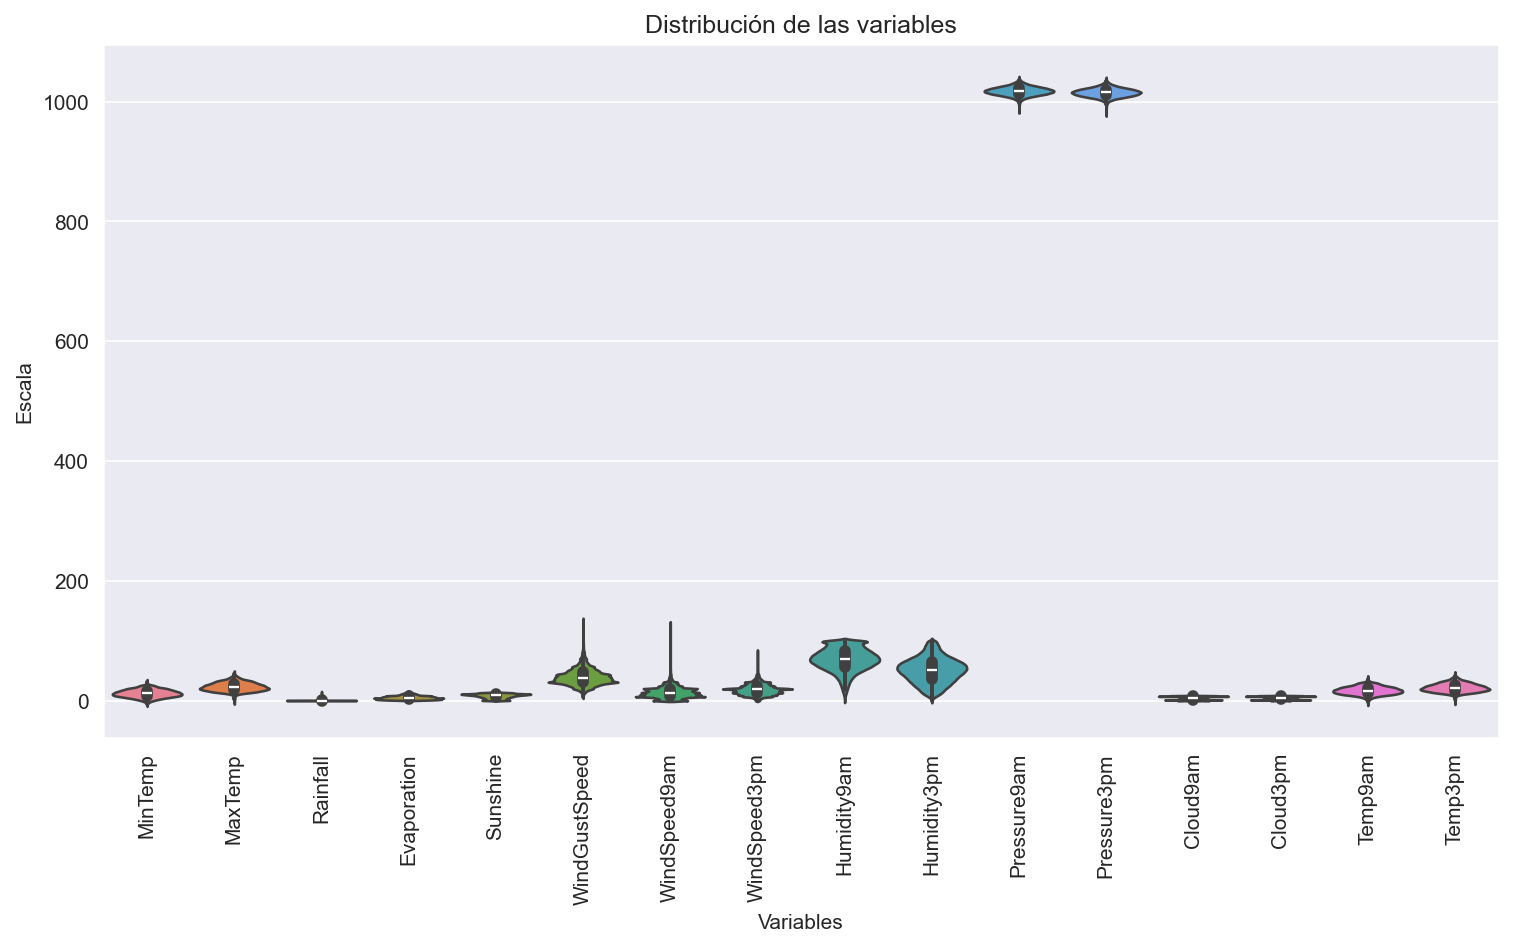

In [58]:
plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
sns.violinplot( data=df_evap_rainfall_filtered)
plt.ylabel("Escala")
plt.xlabel("Variables")
plt.title("Distribución de las variables")

plt.show()

Se puede observar la distribución de las diferentes variables en escalas muy distintas. Algunas variables tienen valores que llegan a más de 1000 (como las variables relacionadas con la presión atmosférica), mientras que otras están mucho más cerca de cero, como la evaporación y la lluvia. Esta disparidad en las escalas de las variables puede ser un problema cuando se utilizan ciertos algoritmos de machine learning, como la regresión logística, el k-NN o los modelos basados en distancias (SVM, K-means), que son sensibles a las diferencias de magnitudes.

Por lo tanto, se va a realizar un escalamiento de los datos antes de aplicar cualquier algoritmo de machine learning. La elección de la técnica de escalamiento dependerá de las características específicas de los datos y del problema en cuestión.

Se utilizarán dos metodos de escalamiento diferentes: Estandarización y Normalizacion. Esto se debe a que luego se van a utilizar más de un modelo de machine learning y, dependiendo cuál se use, es el escalamiento que conviene utilizar.

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df_evap_rainfall_filtered[numerical_columns])

scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df_evap_rainfall_filtered[numerical_columns])


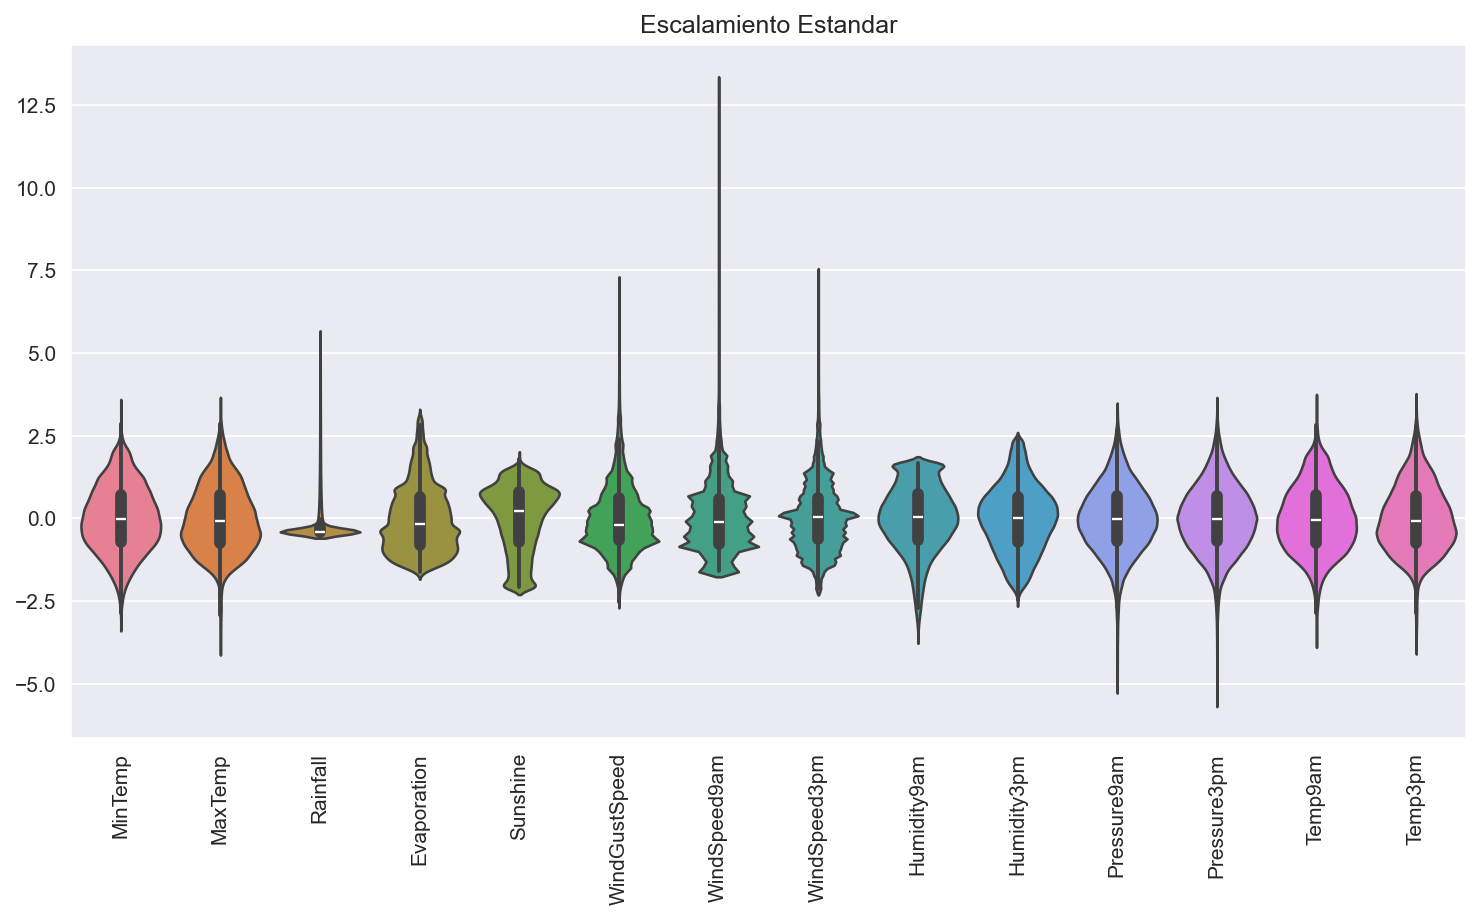

In [60]:
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=numerical_columns)
plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
plt.title("Escalamiento Estandar")
sns.violinplot(data=df_standard_scaled)

plt.show()

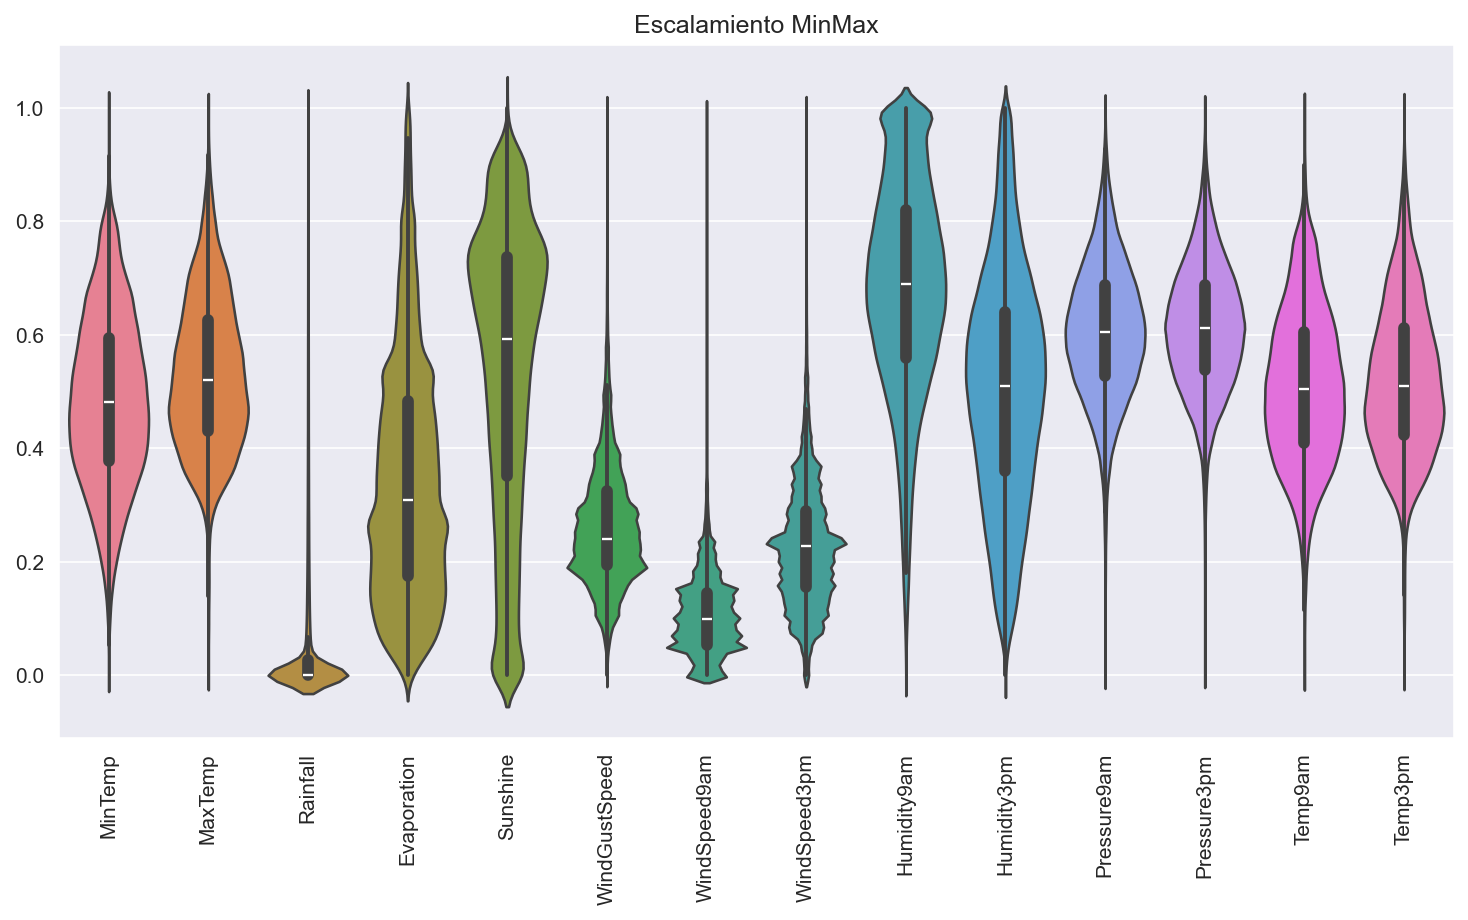

In [61]:
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=numerical_columns)
plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
plt.title("Escalamiento MinMax")
sns.violinplot(data=df_minmax_scaled)

plt.show()

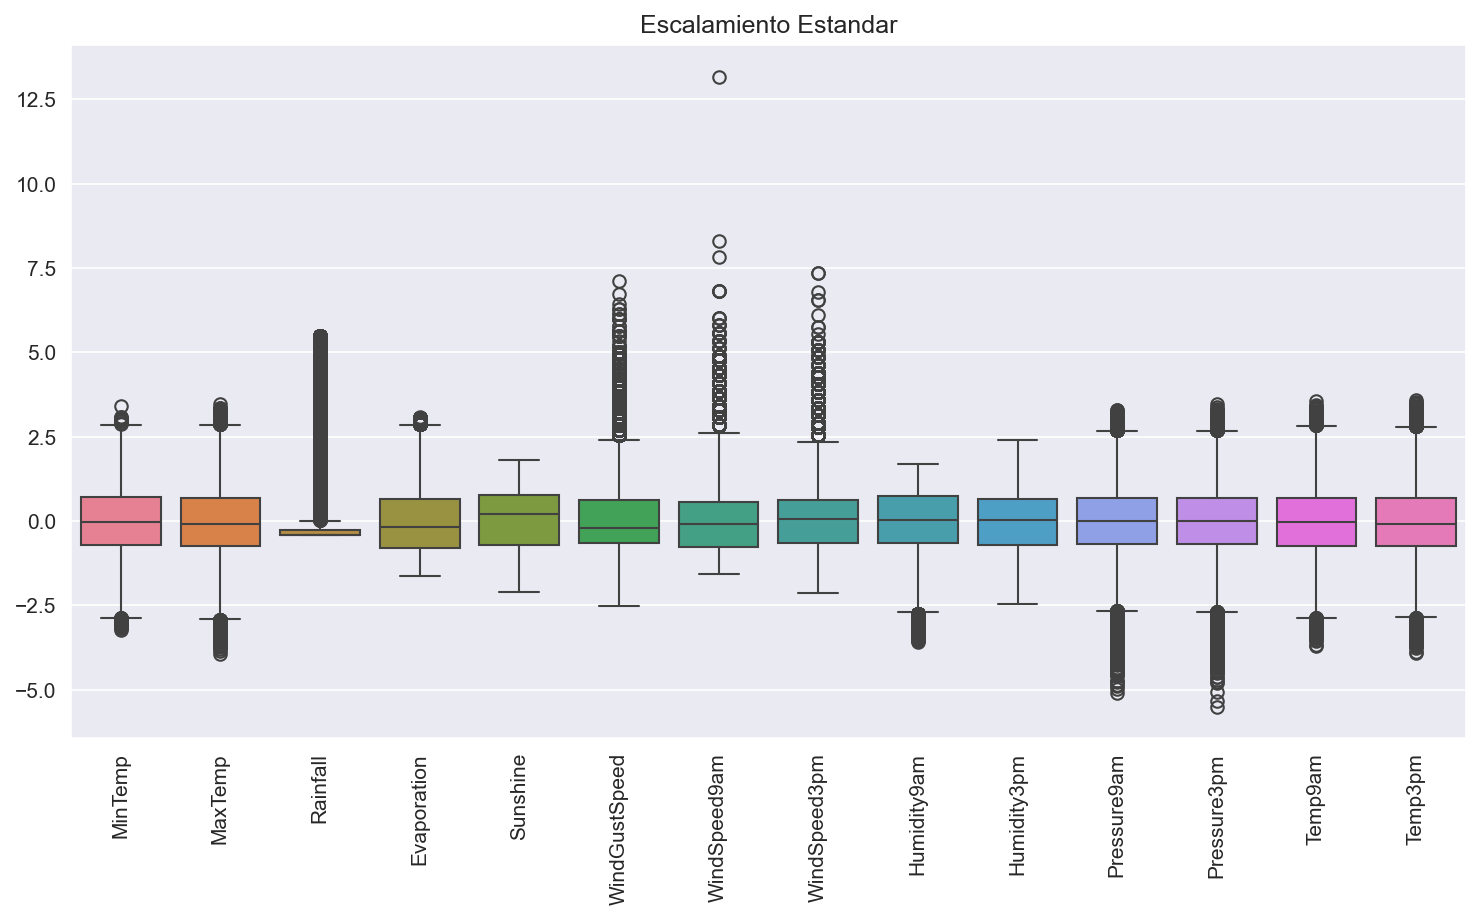

In [62]:
plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
plt.title("Escalamiento Estandar")
sns.boxplot(data=df_standard_scaled)

plt.show()

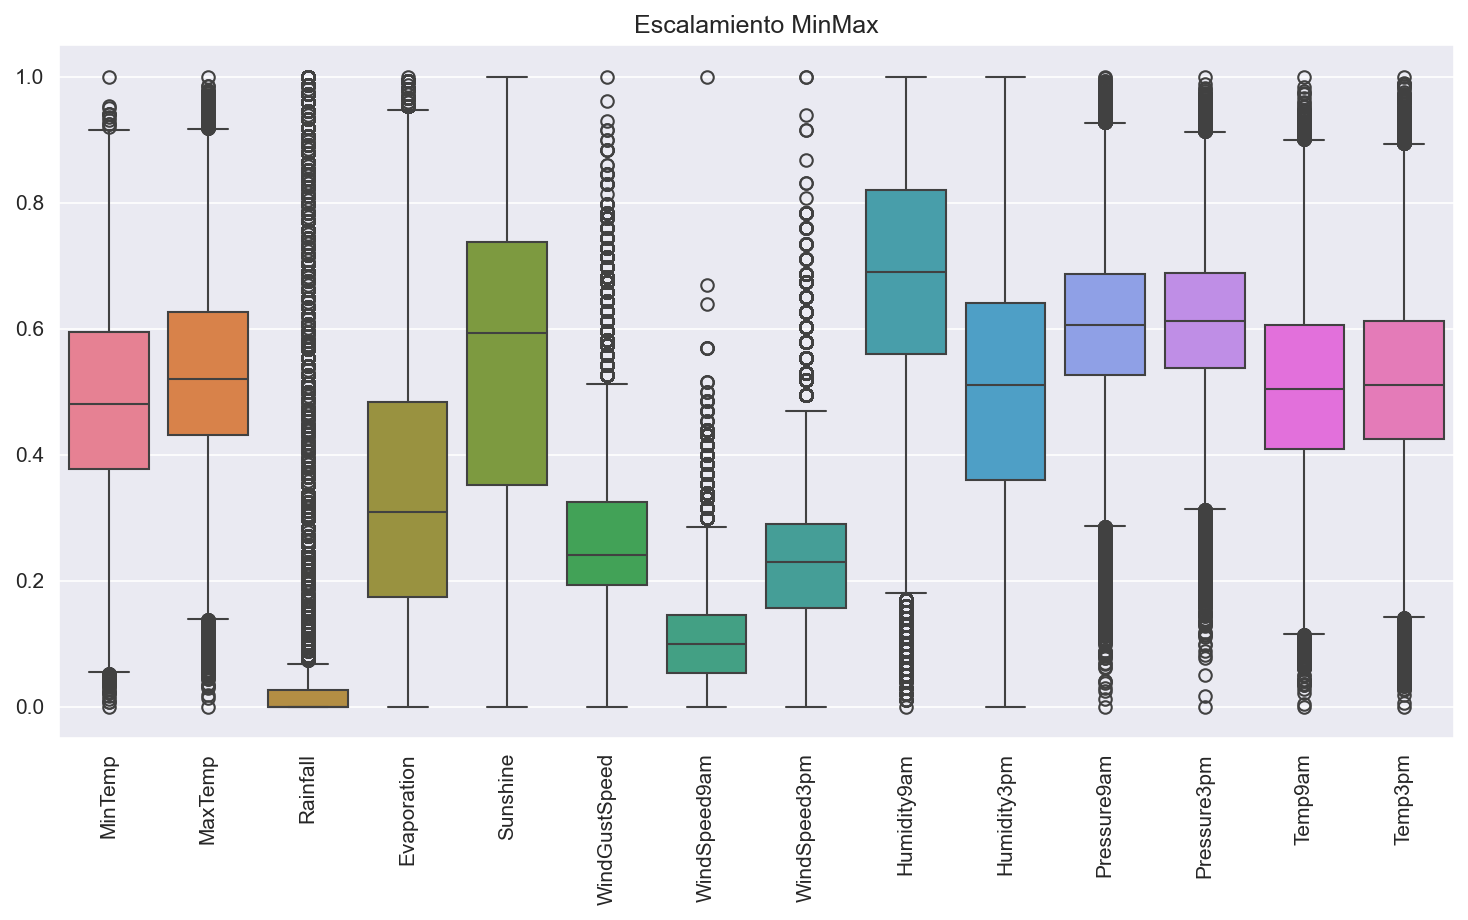

In [63]:
plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
plt.title("Escalamiento MinMax")
sns.boxplot(data=df_minmax_scaled)

plt.show()

In [64]:
df_full_minmax = df_evap_rainfall_filtered.copy()
df_full_standard = df_evap_rainfall_filtered.copy()

df_full_minmax.loc[:, numerical_columns] = df_minmax_scaled[numerical_columns]
df_full_standard.loc[:, numerical_columns] = df_standard_scaled[numerical_columns]

## Imputación de valores faltantes

Al finalizar el tratamiento de outliers y el escalamiento, el resultado es el siguiente:

In [65]:
df_full_minmax.isnull().sum()

Date                 0
Location             0
MinTemp           9154
MaxTemp           9138
Rainfall          8735
Evaporation      63748
Sunshine         69012
WindGustDir       9233
WindGustSpeed    17347
WindDir9am        9492
WindDir3pm        3594
WindSpeed9am      9712
WindSpeed3pm     11100
Humidity9am      10114
Humidity3pm      11982
Pressure9am      21029
Pressure3pm      21083
Cloud9am         51365
Cloud3pm         54736
Temp9am           9312
Temp3pm          11158
RainToday            0
RainTomorrow      1313
dtype: int64

In [66]:
df_full_standard.isnull().sum()

Date                 0
Location             0
MinTemp           9154
MaxTemp           9138
Rainfall          8735
Evaporation      63748
Sunshine         69012
WindGustDir       9233
WindGustSpeed    17347
WindDir9am        9492
WindDir3pm        3594
WindSpeed9am      9712
WindSpeed3pm     11100
Humidity9am      10114
Humidity3pm      11982
Pressure9am      21029
Pressure3pm      21083
Cloud9am         51365
Cloud3pm         54736
Temp9am           9312
Temp3pm          11158
RainToday            0
RainTomorrow      1313
dtype: int64

In [67]:
print(df_full_standard.shape)

(136128, 23)


Lo que se pretende ahora es completar los datos faltantes. Seguir quitando observaciones en este punto es contraproducente puesto que el dataset resultante tendría muy pocos datos, impidiendo un correcto entrenamiento.

In [68]:
def get_coordinates(location):
    return coordinates.get(location, [None, None])

In [69]:
def preprocesamiento_imputacion(df, columns_to_drop):

    df_pre_imputacion = df.copy()
    df_pre_imputacion[['Latitud', 'Longitud']] = df['Location'].apply(get_coordinates).apply(pd.Series)
    df_pre_imputacion = df_pre_imputacion.drop(columns=columns_to_drop)
    return df_pre_imputacion

In [70]:
df_preprocesado_standard = preprocesamiento_imputacion(df_full_standard, ['Date', 'Location'])
df_preprocesado_minmax = preprocesamiento_imputacion(df_full_minmax, ['Date', 'Location'])

In [71]:
df_preprocesado_standard.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Latitud', 'Longitud'],
      dtype='object')

Para preservar la naturaleza circular de las direcciones del viento, se utilizará una Codificación Circular:

In [72]:
wind_direction_mapping = {
    'N': 0,
    'NE': 45,
    'E': 90,
    'SE': 135,
    'S': 180,
    'SW': 225,
    'W': 270,
    'NW': 315
}

wind_related_columns = ["WindGustDir", "WindDir9am", "WindDir3pm"]

In [73]:
def windCircularMapping(df, columns_to_map, mapping):

    df_circular_mapped = df.copy()

    for column in columns_to_map:
        df_circular_mapped[column+'_Angle'] = df_circular_mapped[column].map(mapping)

        df_circular_mapped[column+'_Sin'] = np.sin(np.radians(df_circular_mapped[column+'_Angle']))
        df_circular_mapped[column+'_Cos'] = np.cos(np.radians(df_circular_mapped[column+'_Angle']))
        
        df_circular_mapped = df_circular_mapped.drop(columns=[column, column+'_Angle'])
        
    return df_circular_mapped

In [74]:
df_standard_circular = windCircularMapping(df_preprocesado_standard, wind_related_columns, wind_direction_mapping)
df_minmax_circular = windCircularMapping(df_preprocesado_minmax, wind_related_columns, wind_direction_mapping)

In [75]:
df_minmax_circular.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Latitud',
       'Longitud', 'WindGustDir_Sin', 'WindGustDir_Cos', 'WindDir9am_Sin',
       'WindDir9am_Cos', 'WindDir3pm_Sin', 'WindDir3pm_Cos'],
      dtype='object')

In [76]:
def boolToBinary(df, columns_to_map):
    
    df_binary_converted = df.copy()
    
    for column in columns_to_map:
        df_binary_converted[column] = df_binary_converted[column].map({'No': 0, 'Yes': 1})
        
    return df_binary_converted

In [77]:
bool_columns = ['RainToday', 'RainTomorrow']

df_standard_final = boolToBinary(df_standard_circular, bool_columns)
df_minmax_final = boolToBinary(df_minmax_circular, bool_columns)

In [78]:
df_standard_final.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.209171 -0.056996 -0.168427          NaN       NaN       0.323134   
1 -0.728424  0.251533 -0.407329          NaN       NaN       0.323134   
2  0.131038  0.335677 -0.407329          NaN       NaN       0.472445   
3 -0.447145  0.658231 -0.407329          NaN       NaN      -1.169981   
4  0.849861  1.261265 -0.009159          NaN       NaN       0.099167   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
0      0.694810      0.622881     0.151794    -1.393727  ...          0   
1     -1.120044      0.394245    -1.270280    -1.247397  ...          0   
2      0.581382      0.851517    -1.586297    -1.003514  ...          0   
3     -0.326045     -1.091891    -1.217611    -1.686386  ...          0   
4     -0.779758      0.165608     0.731158    -0.857184  ...          0   

   RainTomorrow  Latitud  Longitud  WindGustDir_Sin  WindGustDir_Cos  \
0           0.0 -36.0801  146.9128        -1.000000    -1.836970e-16   
1           0.0 -36.0801  146.9128              NaN              NaN   
2           0.0 -36.0801  146.9128              NaN              NaN   
3           0.0 -36.0801  146.9128         0.707107     7.071068e-01   
4           0.0 -36.0801  146.9128        -1.000000    -1.836970e-16   

   WindDir9am_Sin  WindDir9am_Cos  WindDir3pm_Sin  WindDir3pm_Cos  
0       -1.000000   -1.836970e-16             NaN             NaN  
1             NaN             NaN             NaN             NaN  
2       -1.000000   -1.836970e-16             NaN             NaN  
3        0.707107   -7.071068e-01        1.000000    6.123234e-17  
4             NaN             NaN       -0.707107    7.071068e-01  

[5 rows x 26 columns]

In [79]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [80]:
imputer = IterativeImputer(max_iter=10, random_state=0)

standard_data_imputed = imputer.fit_transform(df_standard_final)

standard_data_imputed_df = pd.DataFrame(standard_data_imputed, columns=df_standard_final.columns)

/Users/jmestanza/ceia-tps/TP_AdD/tpf-add/.venv/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [81]:
standard_data_imputed_df.sample(10)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
30665  -0.915943 -0.631982 -0.407329    -0.801561  0.625578      -0.647391   
93179   1.365538  0.798471 -0.407329     0.507583  0.619251       1.069691   
27479   0.396690 -0.365525 -0.248061    -0.294799  0.142411       0.323134   
42972  -0.540905 -0.421622 -0.407329    -0.431453  0.231756      -0.871358   
127487  0.009310 -0.054550  0.011645    -0.177946  0.150126       0.015223   
15676  -0.214223 -0.463694 -0.407329    -0.307573 -0.333848      -0.876566   
36726   0.631089 -0.435646  4.768886    -0.379792 -0.621623       1.741592   
40563  -0.650291 -1.024656 -0.407329     0.189241  0.048421       1.293658   
49094  -1.072208 -1.852075  0.309377    -1.183467 -1.425968       0.248478   
9161    0.349810  0.546038 -0.407329    -0.104764  1.055059      -0.871358   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
30665      -0.099188      0.622881    -0.638247     0.167124  ...        0.0   
93179       2.849949      2.109016    -0.427569    -1.101067  ...        0.0   
27479      -1.120044      1.651744    -0.058883     0.411007  ...        0.0   
42972      -1.120044     -0.405982     0.046455    -0.759631  ...        0.0   
127487      0.043729      0.112082    -0.163205     0.053733  ...        0.0   
15676      -1.573757     -0.633413    -0.164222     0.424726  ...        1.0   
36726       2.849949      1.880380     0.151794     1.045103  ...        0.0   
40563       1.942522      0.851517    -0.585578    -1.003514  ...        0.0   
49094      -0.893187     -0.405982     1.679207     1.337763  ...        0.0   
9161       -0.326045     -0.177346    -0.058883    -0.223088  ...        0.0   

        RainTomorrow  Latitud  Longitud  WindGustDir_Sin  WindGustDir_Cos  \
30665            1.0 -33.8688  151.2093        -0.707107    -7.071068e-01   
93179            1.0 -37.8300  140.7670        -1.000000    -1.836970e-16   
27479            0.0 -33.5951  150.7350         0.707107    -7.071068e-01   
42972            0.0 -35.2809  149.1300        -0.089227     7.361978e-01   
127487           0.0 -23.6980  133.8807         0.813748    -7.476214e-01   
15676            0.0 -32.9272  151.7784        -0.639554     5.891472e-01   
36726            0.0 -35.1084  147.3737        -0.025216    -3.690991e-02   
40563            0.0 -34.4278  150.8931         0.707107     7.071068e-01   
49094            0.0 -35.5511  148.7956         0.020594     8.279740e-01   
9161             1.0 -30.2974  153.1135         0.707107     7.071068e-01   

        WindDir9am_Sin  WindDir9am_Cos  WindDir3pm_Sin  WindDir3pm_Cos  
30665    -7.071068e-01   -7.071068e-01       -0.035794       -0.723231  
93179    -1.000000e+00   -1.836970e-16       -0.707107       -0.707107  
27479     1.224647e-16   -1.000000e+00        0.707107       -0.707107  
42972     0.000000e+00    1.000000e+00       -0.209328        0.581565  
127487    3.431870e-01   -5.032040e-01        0.707107       -0.707107  
15676    -4.199617e-01    5.076915e-01       -0.707107        0.707107  
36726    -3.079891e-02    5.756501e-02        0.056626       -0.044792  
40563     4.750359e-01    2.428560e-01        0.707107        0.707107  
49094     2.040530e-01    5.896722e-01        0.000000        1.000000  
9161     -7.071068e-01   -7.071068e-01        0.707107        0.707107  

[10 rows x 26 columns]

In [82]:
standard_data_imputed_df.isnull().sum()

MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustSpeed      0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
Latitud            0
Longitud           0
WindGustDir_Sin    0
WindGustDir_Cos    0
WindDir9am_Sin     0
WindDir9am_Cos     0
WindDir3pm_Sin     0
WindDir3pm_Cos     0
dtype: int64

## Seleccion: Recursive Feature Elimination

Debido a que en la imputacion se utiliza una regresion lineal, es posible ver valores distintos a 0 y 1 en RainTomorrow.

In [100]:
print(standard_data_imputed_df['RainTomorrow'].value_counts())

RainTomorrow
 0.000000    107334
 1.000000     27481
 0.138074         2
 0.472411         2
 0.128012         2
              ...  
 0.161040         1
 0.560554         1
-0.032173         1
 0.205122         1
 0.107757         1
Name: count, Length: 1312, dtype: int64


In [99]:
# define the method
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# fit the model
x_dataset = standard_data_imputed_df.loc[:, standard_data_imputed_df.columns != 'RainTomorrow']
y_dataset = standard_data_imputed_df['RainTomorrow'].apply(lambda x: int(x)).to_numpy()

rfe.fit_transform(x_dataset, y_dataset)

array([[ 3.25535642e-01, -1.45103834e+00,  6.12625361e+00],
       [ 8.01189782e-01, -1.03729297e+00,  4.06897511e+00],
       [ 5.23572923e-01, -1.46530542e+00,  2.00000000e+00],
       ...,
       [ 1.75937271e-01, -4.41441454e-02,  3.27398896e+00],
       [-6.23257489e-01, -2.54818186e-02,  2.00000000e+00],
       [ 1.44781808e-02,  1.89534267e-03,  8.00000000e+00]])

In [101]:
rfe.get_feature_names_out()

array(['Sunshine', 'Pressure9am', 'Cloud3pm'], dtype=object)

Con estas herramientas podriamos concluir cuales son las features mas importantes.
Podriamos ir variando el features to select y ver si se mantienne las features.

In [103]:
for n in [3, 6, 9]:
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n)
    # fit the model
    x_dataset = standard_data_imputed_df.loc[:, standard_data_imputed_df.columns != 'RainTomorrow']
    y_dataset = standard_data_imputed_df['RainTomorrow'].apply(lambda x: int(x)).to_numpy()
    
    rfe.fit_transform(x_dataset, y_dataset)
    most_important_columns = rfe.get_feature_names_out()
    
    print(f'Number of features {n}: ', most_important_columns)

Number of features 3:  ['Sunshine' 'Pressure3pm' 'Cloud3pm']
Number of features 6:  ['Sunshine' 'Pressure3pm' 'Cloud3pm' 'Temp9am' 'Longitud'
 'WindGustDir_Cos']
Number of features 9:  ['Sunshine' 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Longitud'
 'WindGustDir_Cos' 'WindDir9am_Cos' 'WindDir3pm_Sin']


In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_model = pca.fit_transform(x_dataset, y_dataset)

In [112]:
pca_model

array([[  5.202291  ,  -3.48919408],
       [  5.06241328,  -2.91106415],
       [  4.99532217,  -2.66361712],
       ...,
       [-11.37559789,   6.62360107],
       [-11.48160694,   7.05852026],
       [-11.24531146,   6.06520597]])

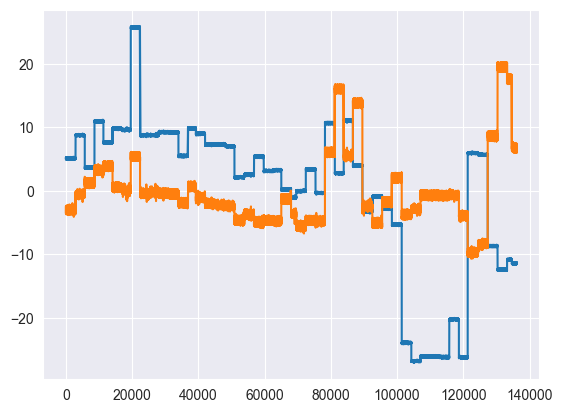

In [113]:
plt.plot(pca_model)